In [1]:
import numpy as np

import pandas as pd

import matplotlib as mpl

import matplotlib.pyplot as plt

import matplotlib.dates as mdates

import seaborn as sns

import datetime

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# _**Tendencias mundiales de urbanización y avance tecnológico: sus posibles consecuencias en la economía, la igualdad de géneros y más**_

Fuente de la base de datos: https://www.kaggle.com/datasets/truecue/worldsustainabilitydataset

Esta es una base de datos que evalúa distintas variables socioeconómicas relacionadas a la sustentabilidad de 173 países a lo largo de 19 años (2000-2018).

# Objetivos:

- a1) Determinar si existe relación entre el porcentaje de población rural y el porcentaje de desempleo femenino.
- a2) Esclarecer si la tendencia de cada continente es hacia una mayor participación política femenina, y cómo esto se relaciona con el porcentaje de desempleo femenino.
- a3) Predecir cuándo podría alcanzarse un balance de participación política femenina (aproximadamente 50%) en cada país.

- b1) Analizar las tendencias de urbanización en distintas zonas del mundo.
- b2) Investigar cómo se comporta la prevalencia de desnutrición en poblaciones urbanas y rurales.

- c) Explorar si existe una relación entre las variables seleccionadas a partir de un proceso de Feature Selection y el PBI per cápita.

- d) Diseñar una función que me permita estimar el PBI per cápita a partir de las variables seleccionadas.

# Contexto:

Muchas veces escuchamos hablar de una creciente desigualdad en la riqueza y la calidad de vida a nivel mundial. Contamos con distintas medidas socioeconómicas que nos permitirían explorar mejor qué factores afectarían esa desigualdad.

Dentro de la desigualdad económica entre los distintos países, también encontramos una desigualdad económica entre géneros. Muchas veces las mujeres enfrentan mayores dificultades a la hora de conseguir un empleo. Uno de los objetivos de este proyecto es determinar si el porcentaje de población rural tiene relación con el nivel de desempleo femenino, basándose en la creencia de que el trabajo rural se encuentra mayormente ocupado por hombres.
A su vez, podemos notar que en los últimos años es más fácil encontrar mujeres ocupando puestos políticos en distintos niveles, pero es esto una tendencia creciente real? Y se comporta de la misma manera en las distintas regiones del mundo? Cuánto tiempo nos llevaría alcanzar un balance de participación política entre generos (aprox. 50%)?

Distintas investigaciones postulan que una creciente y rápida urbanización puede estar relacionada con una peor calidad de alimentación. En este proyecto también buscamos analizar si estas postulaciones pueden verse a partir de la prevalencia de desnutrición en países más urbanizados.

Por último, buscaremos explorar posibles relaciones entre un mayor acceso a mejores servicios y tecnologías y un crecimiento del PBI per cápita, que refleja una mayor actividad economica de la poblacion y una disminucion del desempleo general.


# Descripción de variables:

- Country: Nombre del país
- Country_code: Código del país
- Year: año
- Electricity: Porcentaje de la población con acceso a la electricidad
- Net_income_per_cap: Porcentaje anual de crecimiento del ingreso económico neto de un país, dividido por su número de habitantes.
- Children_out_school: Porcentaje de niños en edad escolar **primaria** no escolarizados.
- GDP: Valor en USD del total de bienes y servicios producidos en un país. Equivalente al PBI o PIB en español.
- GDP_per_cap: GDP de un país dividido por el total de su población.
- Fem_parliam: Porcentaje de mujeres ocupando bancas en el parlamento
- Renew_output: Porcentaje de energía renovable producida respecto al total de la energía producida.
- Renew_consum: Porcentaje de energía renovable consumida respecto al total de energía producida.
- Undernour: Porcentaje de la población cuyo consumo habitual de alimentos es insuficiente para alcanzar la energía necesaria para mantener una vida activa y saludable. (% desnutrición)
- Poverty: Proporción de población debajo de la línea internacional de pobreza (vive con menos de 1.90USD diario).
- 2_G: Porcentaje de personas que habitan en el rango de cobertura de 2G (tengan o no celular)
- 3_G: Porcentaje de personas que habitan en el rango de cobertura de 3G (tengan o no celular)
- Water: Porcentaje de población con acceso sostenido a servicios básicos de agua potable.
- Unemp_male: Porcentaje de hombres en edad laboral desempleados, pero disponibles y buscando trabajo.
- Unemp_fem: Porcentaje de mujeres en edad laboral desempleadas, pero disponibles y buscando trabajo.
- Continent: Continente al que pertenece el país.
- Gini: Score otorgado en base a qué tan equitativamente está repartido el ingreso dentro de un país
- Income_class: Clasificación por tipo de ingreso (low, lower-middle, upper-middle, high) según país
- Internet: Porcentaje de la población con acceso a internet
- Life_exp: Esperanza de vida al nacer (años)
- Population: Población total.
- Rural_pop: Porcentaje de la población total de cada país que ocupa áreas rurales
- Urban_pop: Porcentaje de la población total de cada país que ocupa áreas urbanas
- Region: Región a la que pertenece el país.

# Exploratory Data Analyses (EDA) & Data Cleaning

In [2]:
#Lectura de base de datos y revisión de dimensiones y tipo de datos.

data = pd.read_csv('WorldSustainabilityDataset_selected.csv')
print(data.shape)
print(data.info())

(3287, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              3287 non-null   object 
 1   Country_code         3287 non-null   object 
 2   Year                 3287 non-null   int64  
 3   Electricity          3193 non-null   float64
 4   Net_income_per_cap   2566 non-null   float64
 5   Children_out_school  2225 non-null   float64
 6   GDP                  3246 non-null   float64
 7   GDP_per_cap          3246 non-null   float64
 8   Fem_parliam          3062 non-null   float64
 9   Renew_output         2771 non-null   float64
 10  Renew_consum         3287 non-null   float64
 11  Undernour            1834 non-null   float64
 12  Poverty              1304 non-null   float64
 13  2_G                  2349 non-null   float64
 14  3_G                  1357 non-null   float64
 15  Water                1837 n

In [3]:
#Cálculo de medidas descriptivas de las variables

data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Year,3287.0,2.009000e+03,5.480000e+00,2.000000e+03,2.004000e+03,2.009000e+03,2.014000e+03,2.018000e+03
Electricity,3193.0,7.930000e+01,3.040000e+01,1.270000e+00,6.290000e+01,9.865000e+01,1.000000e+02,1.000000e+02
Net_income_per_cap,2566.0,2.500000e+00,1.875000e+01,-6.456600e+02,-2.500000e-01,2.550000e+00,5.550000e+00,2.294900e+02
Children_out_school,2225.0,7.580000e+00,1.131000e+01,0.000000e+00,7.700000e-01,2.970000e+00,9.120000e+00,7.310000e+01
GDP,3246.0,3.508274e+11,1.406315e+12,1.811170e+08,6.549898e+09,2.497886e+10,1.760442e+11,2.061190e+13
GDP_per_cap,3246.0,1.230569e+04,1.782652e+04,9.053000e+01,1.270320e+03,4.335710e+03,1.535466e+04,1.188236e+05
Fem_parliam,3062.0,1.798000e+01,1.115000e+01,0.000000e+00,9.820000e+00,1.600000e+01,2.447000e+01,6.375000e+01
Renew_output,2771.0,3.236000e+01,3.370000e+01,0.000000e+00,1.890000e+00,1.786000e+01,5.771000e+01,1.000000e+02
Renew_consum,3287.0,3.267000e+01,2.992000e+01,0.000000e+00,6.840000e+00,2.266000e+01,5.464000e+01,9.834000e+01
Undernour,1834.0,1.450000e+01,1.138000e+01,2.500000e+00,5.700000e+00,1.040000e+01,2.020000e+01,6.750000e+01


In [4]:
#Chequeo de presencia de datos nulos por variable

data.isna().sum()

Country                   0
Country_code              0
Year                      0
Electricity              94
Net_income_per_cap      721
Children_out_school    1062
GDP                      41
GDP_per_cap              41
Fem_parliam             225
Renew_output            516
Renew_consum              0
Undernour              1453
Poverty                1983
2_G                     938
3_G                    1930
Water                  1450
Unemp_male             1480
Unemp_fem              1481
Continent                 0
Gini                   1984
Income_class              0
Internet                301
Life_exp                191
Population              181
Rural_pop                 9
Urban_pop               181
Region                    0
dtype: int64

In [5]:
#Busco la manera de reemplazar los casos nulos por el promedio de esa variable en la región, si es posible.
#Hacerlo con la media total de la variable llevaría a errores de interpretación.

#Comienzo haciendo una copia del dataframe principal, dentro de la que buscaré rellenar los casos nulos

df = data.copy()
df.shape

(3287, 27)

### Hasta encontrar una manera de rellenar los casos nulos con los valores especificos nombrados en el bloque anterior, rellenare los valores nulos con el promedio del total de los casos.

In [6]:
#Relleno casos nulos con el promedio del total de casos de cada variable

df['Electricity']=df['Electricity'].fillna(df['Electricity'].mean())
df['Net_income_per_cap']=df['Net_income_per_cap'].fillna(df['Net_income_per_cap'].mean())
df['Children_out_school']=df['Children_out_school'].fillna(df['Children_out_school'].mean())
df['GDP']=df['GDP'].fillna(df['GDP'].mean())
df['GDP_per_cap']=df['GDP_per_cap'].fillna(df['GDP_per_cap'].mean())
df['Fem_parliam']=df['Fem_parliam'].fillna(df['Fem_parliam'].mean())
df['Renew_output']=df['Renew_output'].fillna(df['Renew_output'].mean())
df['Undernour']=df['Undernour'].fillna(df['Undernour'].mean())
df['Poverty']=df['Poverty'].fillna(df['Poverty'].mean())
df['2_G']=df['2_G'].fillna(df['2_G'].mean())
df['3_G']=df['3_G'].fillna(df['3_G'].mean())
df['Water']=df['Water'].fillna(df['Water'].mean())
df['Unemp_male']=df['Unemp_male'].fillna(df['Unemp_male'].mean())
df['Unemp_fem']=df['Unemp_fem'].fillna(df['Unemp_fem'].mean())
df['Gini']=df['Gini'].fillna(df['Gini'].mean())
df['Internet']=df['Internet'].fillna(df['Internet'].mean())
df['Life_exp']=df['Life_exp'].fillna(df['Life_exp'].mean())
df['Population']=df['Population'].fillna(df['Population'].mean())
df['Rural_pop']=df['Rural_pop'].fillna(df['Rural_pop'].mean())
df['Urban_pop']=df['Urban_pop'].fillna(df['Urban_pop'].mean())


In [7]:
df.isna().sum()

Country                0
Country_code           0
Year                   0
Electricity            0
Net_income_per_cap     0
Children_out_school    0
GDP                    0
GDP_per_cap            0
Fem_parliam            0
Renew_output           0
Renew_consum           0
Undernour              0
Poverty                0
2_G                    0
3_G                    0
Water                  0
Unemp_male             0
Unemp_fem              0
Continent              0
Gini                   0
Income_class           0
Internet               0
Life_exp               0
Population             0
Rural_pop              0
Urban_pop              0
Region                 0
dtype: int64

In [8]:
df.tail(5)

,Country,Country_code,Year,Electricity,Net_income_per_cap,Children_out_school,GDP,GDP_per_cap,Fem_parliam,Renew_output,...,Unemp_fem,Continent,Gini,Income_class,Internet,Life_exp,Population,Rural_pop,Urban_pop,Region
3282,Zimbabwe,ZWE,2014,32.300000,0.763955,7.579437,1.949552e+10,1434.896277,31.481481,55.605426,...,5.200000,Africa,37.512203,Low_income,16.364740,58.410,13586710.0,67.496,32.504,Sub-Saharan_Africa
3283,Zimbabwe,ZWE,2015,33.700000,10.749009,7.579437,1.996312e+10,1445.069702,31.481481,52.724276,...,9.810687,Africa,37.512203,Low_income,22.742818,59.534,13814642.0,67.615,32.385,Sub-Saharan_Africa
3284,Zimbabwe,ZWE,2016,39.676228,-0.716048,7.579437,2.054868e+10,1464.588957,31.481481,32.361581,...,9.810687,Africa,37.512203,Low_income,23.119989,60.294,14030338.0,67.704,32.296,Sub-Saharan_Africa
3285,Zimbabwe,ZWE,2017,40.144283,28.172572,7.579437,1.901533e+10,1335.665064,32.575758,32.361581,...,9.810687,Africa,44.300000,Low_income,24.400000,60.812,14236599.0,67.763,32.237,Sub-Saharan_Africa
3286,Zimbabwe,ZWE,2018,40.616360,61.556580,7.579437,1.952362e+10,1352.162653,31.481481,32.361581,...,9.810687,Africa,37.512203,Low_income,25.000000,61.195,14438812.0,67.791,32.209,Sub-Saharan_Africa


**Creo un dataframe que incluya exclusivamente las variables considerables features, apartando los tipos de variables 'object' e 'int64'(que solo representaba la variable 'Year')**

In [9]:
features = df.select_dtypes(exclude=['object', 'int64'])
features.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Electricity          3287 non-null   float64
 1   Net_income_per_cap   3287 non-null   float64
 2   Children_out_school  3287 non-null   float64
 3   GDP                  3287 non-null   float64
 4   GDP_per_cap          3287 non-null   float64
 5   Fem_parliam          3287 non-null   float64
 6   Renew_output         3287 non-null   float64
 7   Renew_consum         3287 non-null   float64
 8   Undernour            3287 non-null   float64
 9   Poverty              3287 non-null   float64
 10  2_G                  3287 non-null   float64
 11  3_G                  3287 non-null   float64
 12  Water                3287 non-null   float64
 13  Unemp_male           3287 non-null   float64
 14  Unemp_fem            3287 non-null   float64
 15  Gini                 3287 non-null   f

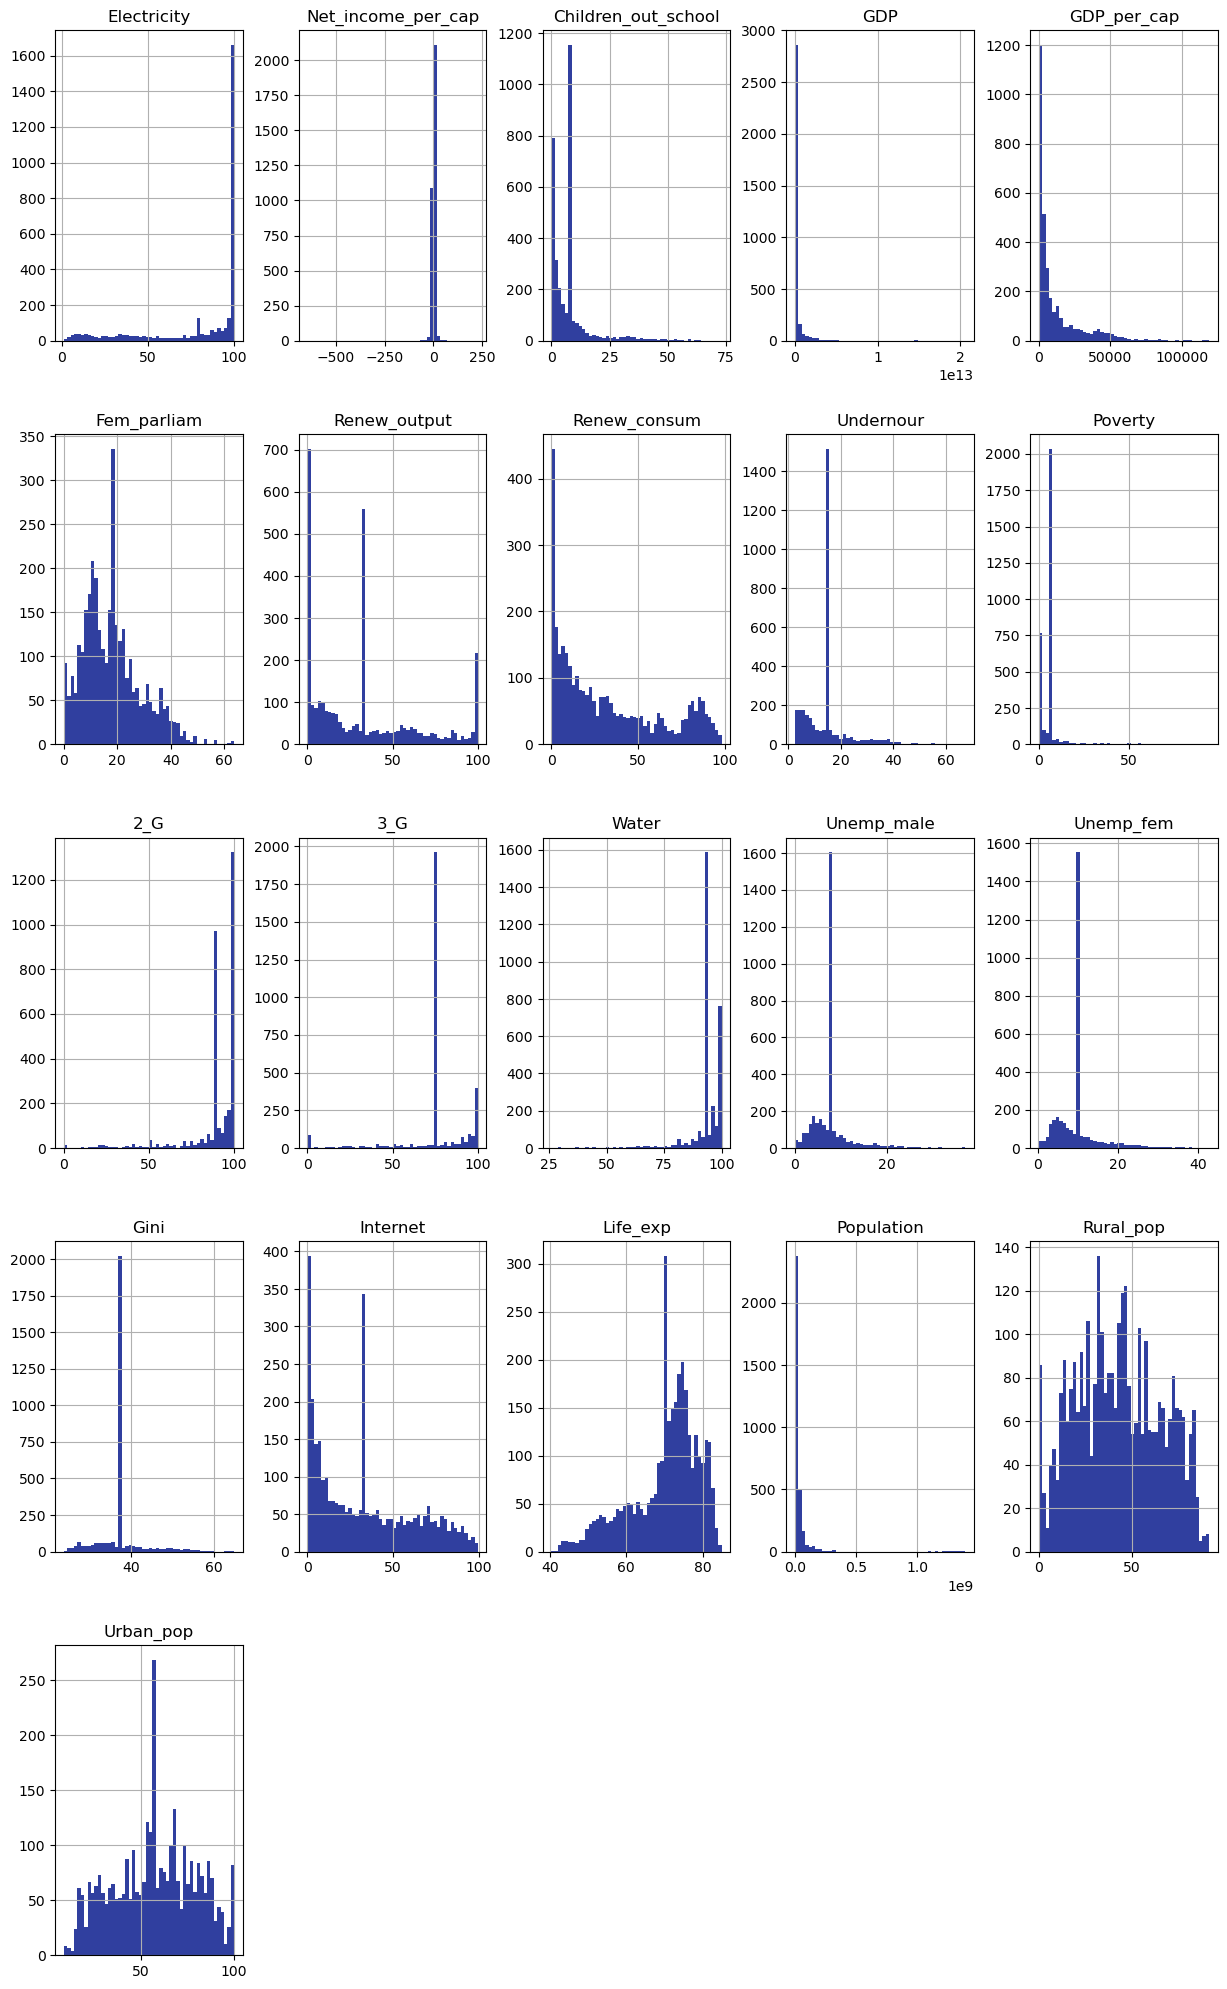

In [10]:
#Graficamos los histogramas de nuestras features
features.hist(bins=50, figsize=(15,25), color = '#303F9F')
plt.show()

In [11]:
#features_std = (features - features.mean()) / features.std()
#features_std.head(2)


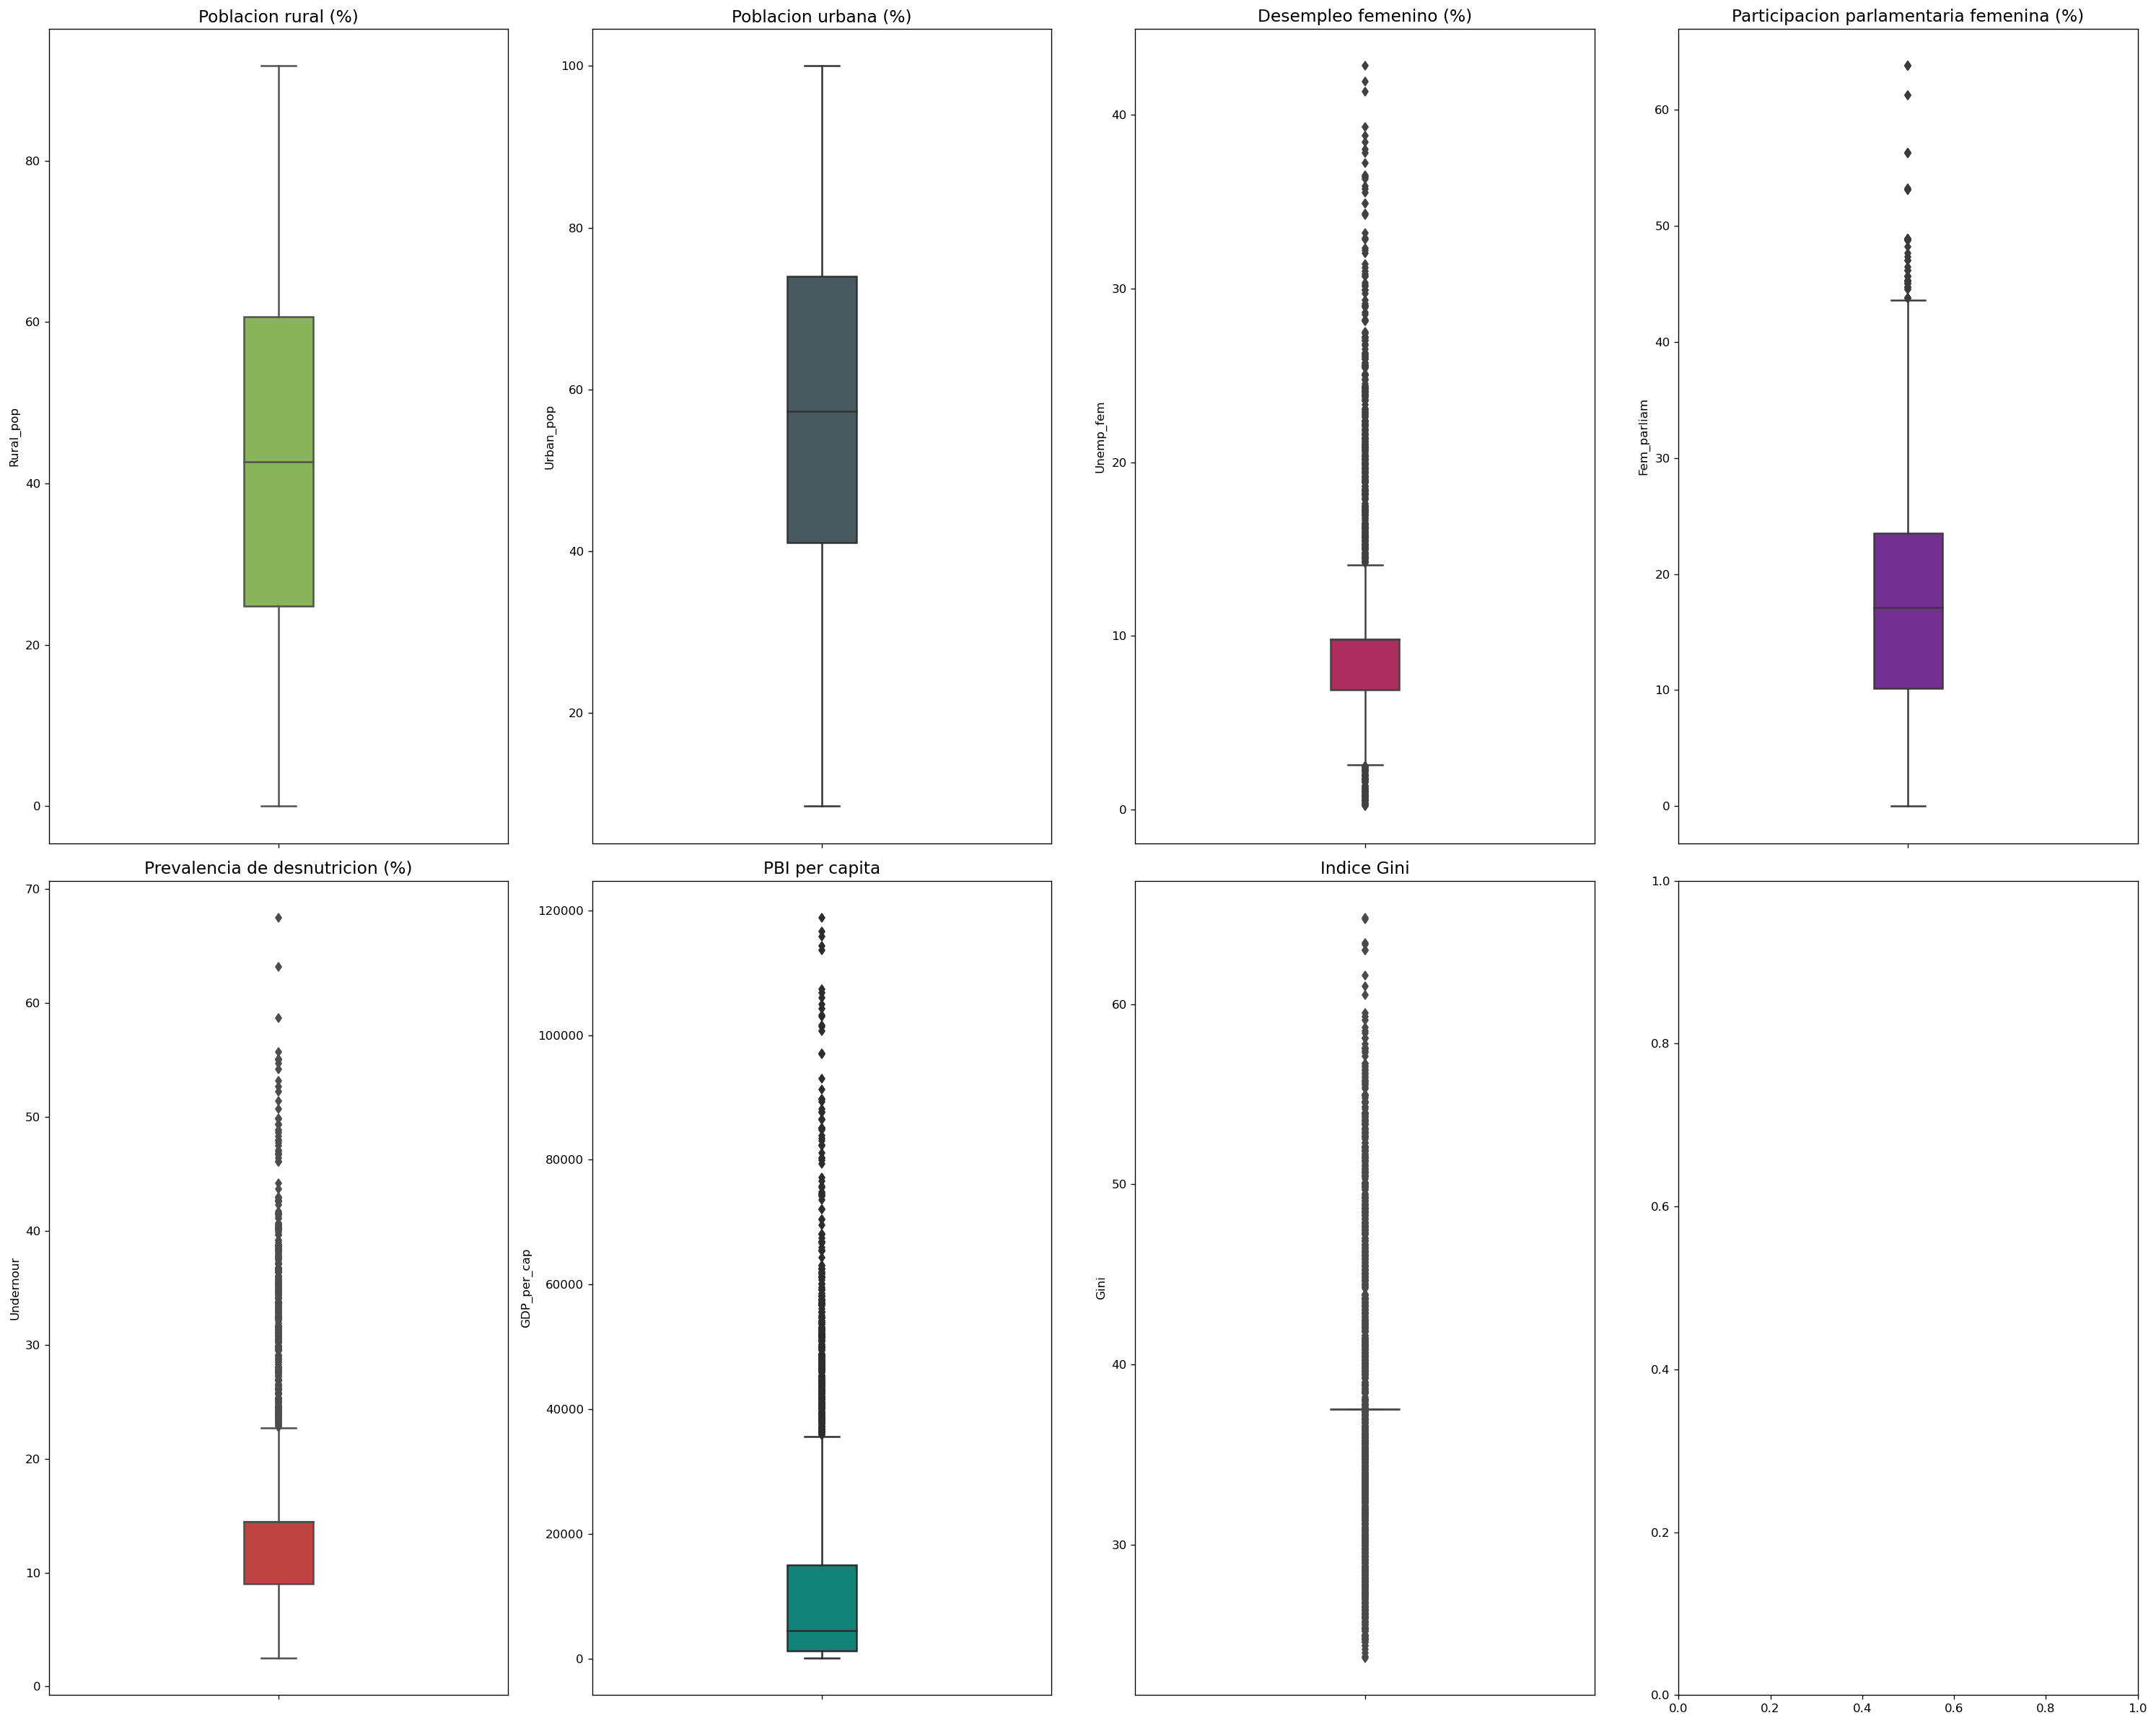

In [12]:
fig, ax = plt.subplots(nrows=2,ncols=4,dpi=120,figsize = (25,20))

ax[0,0].set_title('Poblacion rural (%)',fontdict={'fontsize':14})

sns.boxplot(y = features['Rural_pop'], data=features, color='#8BC34A', width = 0.15, ax = ax[0,0])

ax[0,1].set_title('Poblacion urbana (%)',fontdict={'fontsize':14})

sns.boxplot(y = features['Urban_pop'], data=features, color='#455A64', width = 0.15, ax = ax[0,1])

ax[0,2].set_title('Desempleo femenino (%)',fontdict={'fontsize':14})

sns.boxplot(y = features['Unemp_fem'], data=features, color='#C2185B', width = 0.15, ax = ax[0,2])

ax[0,3].set_title('Participacion parlamentaria femenina (%)',fontdict={'fontsize':14})

sns.boxplot(y = features['Fem_parliam'], data=features, color='#7B1FA2', width = 0.15, ax = ax[0,3])

ax[1,0].set_title('Prevalencia de desnutricion (%)',fontdict={'fontsize':14})

sns.boxplot(y = features['Undernour'], data=features, color='#D32F2F', width = 0.15, ax = ax[1,0])

ax[1,1].set_title('PBI per capita',fontdict={'fontsize':14})

sns.boxplot(y = features['GDP_per_cap'], data=features, color='#009688', width = 0.15, ax = ax[1,1])

ax[1,2].set_title('Indice Gini',fontdict={'fontsize':14})

sns.boxplot(y = features['Gini'], data=features, color='#F57C00', width = 0.15, ax = ax[1,2])



plt.tight_layout()

plt.show()

In [13]:
serv_and_tech = features[['Water', 'Internet', '2_G', '3_G']]
print(serv_and_tech.head(3))
print(type(serv_and_tech))
del serv_and_tech

       Water   Internet        2_G       3_G
0  92.916168  33.117667  89.510353  74.17636
1  92.916168  17.100000  89.510353  74.17636
2  92.916168  18.800000  89.510353  74.17636
<class 'pandas.core.frame.DataFrame'>


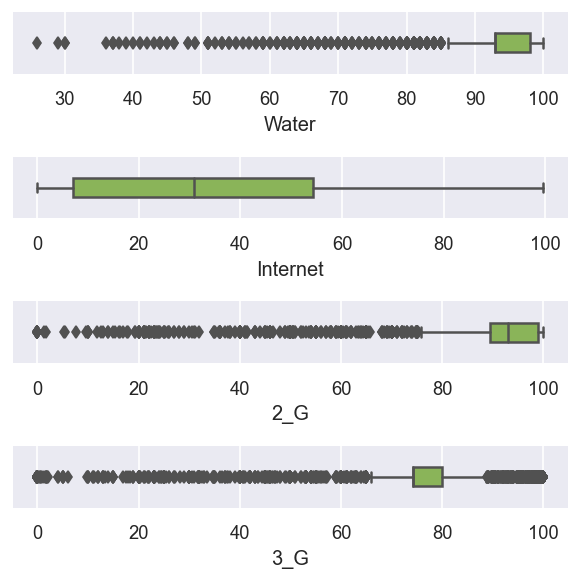

In [14]:
sns.set(rc={'figure.figsize':(5,5)})

fig,axes = plt.subplots(nrows=4,ncols=1,dpi=120,figsize = (5,5))

sns.boxplot(x = features['Water'], data=features, color='#8BC34A', width = 0.3, ax = axes[0])
#ax=axes[0].yaxis.set_major_formatter(x_formatter)
#ax = axes[0].set_title('Water', fontsize = 12)

plt.tight_layout()

sns.boxplot(x = features['Internet'], data=features, color='#8BC34A', width = 0.3, ax = axes[1])
#ax=axes[0].yaxis.set_major_formatter(x_formatter)
#ax = axes[1].set_title('Internet', fontsize = 12)
plt.tight_layout()

sns.boxplot(x = features['2_G'], data=features, color='#8BC34A', width = 0.3, ax = axes[2])
#ax=axes[0].yaxis.set_major_formatter(x_formatter)
#ax = axes[2].set_title('2_G', fontsize = 12)

plt.tight_layout()

sns.boxplot(x = features['3_G'], data=features, color='#8BC34A', width = 0.3, ax = axes[3])
#ax=axes[0].yaxis.set_major_formatter(x_formatter)
#ax = axes[3].set_title('3_G', fontsize = 12)

plt.tight_layout()

In [15]:
#Preparo esta mascara para graficar un heatmap sin repeticion de los datos

mask = np.zeros_like(features.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

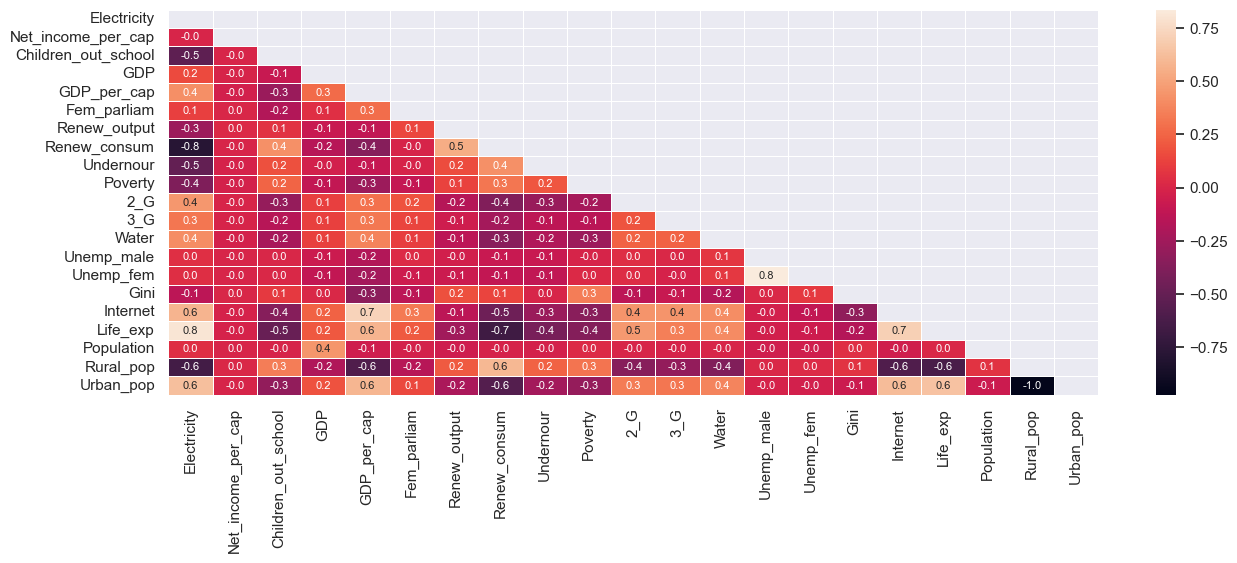

In [16]:
f, ax = plt.subplots(figsize=(15,5))
sns.heatmap(features.corr(), annot = True, annot_kws = {"size": 8}, mask = mask,  linewidth=0.4, fmt='.1f', ax=ax)
sns.set_style('white')
plt.show()

### Viendo los resultados del heatmap, considero que hay features que podrían descartarse para este estudio.
### Por lo tanto, a continuación intentaré hacer una selección de features.

# Feature Selection

### A partir del heatmap indicando las correlaciones entre las distintas features, vemos que el porcentaje de población rural y urbana tienen un comportamiento especular, de modo que, para no caer en una especie de redundancia, voy a descartar la feature Urban_pop, ya que no agrega información a lo que pueda decir Rural_pop.

In [17]:
del features['Urban_pop']
features.columns

Index(['Electricity', 'Net_income_per_cap', 'Children_out_school', 'GDP',
       'GDP_per_cap', 'Fem_parliam', 'Renew_output', 'Renew_consum',
       'Undernour', 'Poverty', '2_G', '3_G', 'Water', 'Unemp_male',
       'Unemp_fem', 'Gini', 'Internet', 'Life_exp', 'Population', 'Rural_pop'],
      dtype='object')

### Lo mismo sucede entre las variables que indican el porcentaje de desempleo masculino y femenino. Actuan de manera especular entre si, y esto lleva a una redundancia de los datos. Al no estar utilizando, ademas, el porcentaje de desempleo masculino en mis hipotesis, voy a descartar dicha variable tambien.

In [18]:
del features['Unemp_male']
features.columns

Index(['Electricity', 'Net_income_per_cap', 'Children_out_school', 'GDP',
       'GDP_per_cap', 'Fem_parliam', 'Renew_output', 'Renew_consum',
       'Undernour', 'Poverty', '2_G', '3_G', 'Water', 'Unemp_fem', 'Gini',
       'Internet', 'Life_exp', 'Population', 'Rural_pop'],
      dtype='object')

### Por otro lado, la variable que muestra el ingreso bruto per capita no exhibe ninguna asociacion con ninguna otra variable de la base de datos, por lo que tambien puede provocar un sesgo a la hora de realizar los analisis, y provocar un underfitting. Por esto, tambien sera eliminada.

In [19]:
del features['Net_income_per_cap']
print(features.columns)
print(features.shape)

Index(['Electricity', 'Children_out_school', 'GDP', 'GDP_per_cap',
       'Fem_parliam', 'Renew_output', 'Renew_consum', 'Undernour', 'Poverty',
       '2_G', '3_G', 'Water', 'Unemp_fem', 'Gini', 'Internet', 'Life_exp',
       'Population', 'Rural_pop'],
      dtype='object')
(3287, 18)


### Algunas features (Indice GINI y Pobreza entre las mas afectadas) tuvieron un valor de NaN mayor al 50% de las entradas. Deberia eliminarlas? Porque los NaN fueron reemplazados por la media, y al ser tantos podria ser un sesgo muy grande

## _Importancia de las features con Random Forest (basada en Feature permutation):_

In [20]:
F = features.iloc[:,:18]
del F['Life_exp']
F.shape

(3287, 17)

In [21]:
#Luego de intentos fallidos creo que el hecho de que la esperanza de vida fuera de tipo float era un problema para entrenar
#el modelo, asi que la convierto al tipo int. Al indicar una edad de esperanza de vida, no es un problema la conversion.

life = features['Life_exp'].round(0)
life = life.astype('int')
type(life)
life.head()

0    70
1    74
2    74
3    74
4    74
Name: Life_exp, dtype: int32

In [22]:
from sklearn.model_selection import train_test_split

F_train, F_test, life_train, life_test = train_test_split(F, life, random_state = 42)

In [23]:
from sklearn.ensemble import RandomForestClassifier

feature_names = F_train.columns

forest = RandomForestClassifier(random_state=0)
forest.fit(F_train, life_train) #Entreno modelo con mis datos de train, este va a ser el estimator para usar en permutation_importance

RandomForestClassifier(random_state=0)

In [24]:
from sklearn.inspection import permutation_importance


result = permutation_importance(forest, F_test, life_test, n_repeats=15, random_state=42, n_jobs=2)


forest_importances = pd.Series(result.importances_mean, index=feature_names)

In [25]:
forest_importances

Electricity            0.081995
Children_out_school    0.002028
GDP                    0.022790
GDP_per_cap            0.087024
Fem_parliam            0.019546
Renew_output           0.009732
Renew_consum           0.032198
Undernour              0.016221
Poverty                0.006813
2_G                    0.013706
3_G                    0.028386
Water                  0.013220
Unemp_fem              0.006326
Gini                  -0.000324
Internet               0.119303
Population             0.065693
Rural_pop              0.049392
dtype: float64

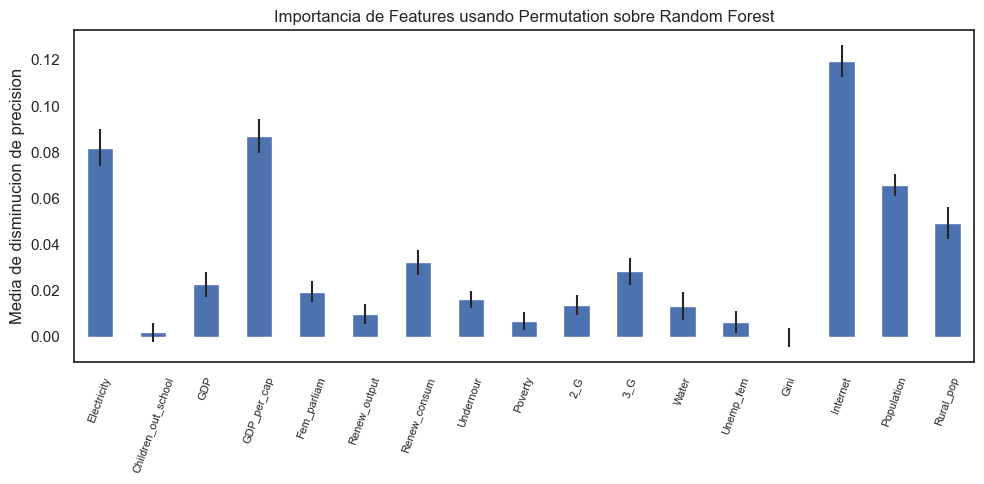

In [26]:
fig, ax = plt.subplots(figsize = (10, 5))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Importancia de Features usando Permutation sobre Random Forest")
ax.set_ylabel("Media de disminucion de precision")
plt.xticks(rotation = 70, fontsize = 8)
fig.tight_layout()
plt.show()

### Entonces a partir de este metodo, podemos ver que al permutar las variables que son más importantes, la precisión del modelo disminuye.

## Siguiendo el proceso de Feature selection basado en permutaciones sobre un modelo de Random Forest, podriamos seleccionar como Features a las siguientes:

- Internet

- PBI per capita (GDP_per_cap)

- Electricidad

- Poblacion total

- Poblacion Rural

Sumados a la target feature seleccionada: 
- Life expectancy (Esperanza de vida)








------------------------------------


In [27]:
#Creo un dataframe con los features seleccionados y la variable usada como target

sel_feat = features[['Internet', 'GDP_per_cap', 'Electricity', 'Population', 'Rural_pop', 'Life_exp']]
sel_feat

,Internet,GDP_per_cap,Electricity,Population,Rural_pop,Life_exp
0,33.117667,20617.750470,91.660398,3.891506e+07,53.283,70.160098
1,17.100000,20670.367010,100.000000,9.289200e+04,53.661,73.853000
2,18.800000,20436.887130,100.000000,9.499200e+04,54.028,73.937000
3,20.800000,20833.976360,100.000000,9.701600e+04,54.394,74.038000
4,23.000000,22568.374990,100.000000,9.874400e+04,54.760,74.156000
...,...,...,...,...,...,...
3282,16.364740,1434.896277,32.300000,1.358671e+07,67.496,58.410000
3283,22.742818,1445.069702,33.700000,1.381464e+07,67.615,59.534000
3284,23.119989,1464.588957,39.676228,1.403034e+07,67.704,60.294000
3285,24.400000,1335.665064,40.144283,1.423660e+07,67.763,60.812000


In [28]:
mask1 = np.zeros_like(sel_feat.corr())
triangle_indices1 = np.triu_indices_from(mask1)
mask1[triangle_indices1] = True

<AxesSubplot:>

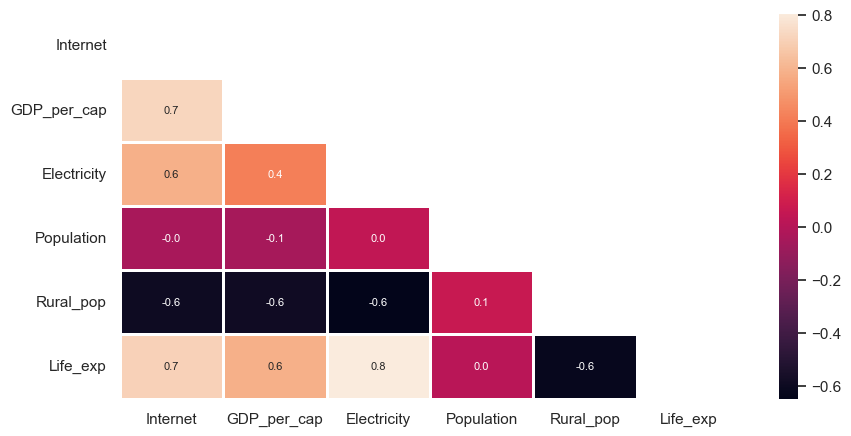

In [29]:
f, ax = plt.subplots(figsize=(10,5))
#sns.heatmap(features_std.corr(), annot=True, linewidth=0.5, fmt='.1f', ax=ax)
sns.heatmap(sel_feat.corr(), annot=True, linewidth=0.8, fmt='.1f', ax=ax, mask = mask1, annot_kws = {"size": 8})

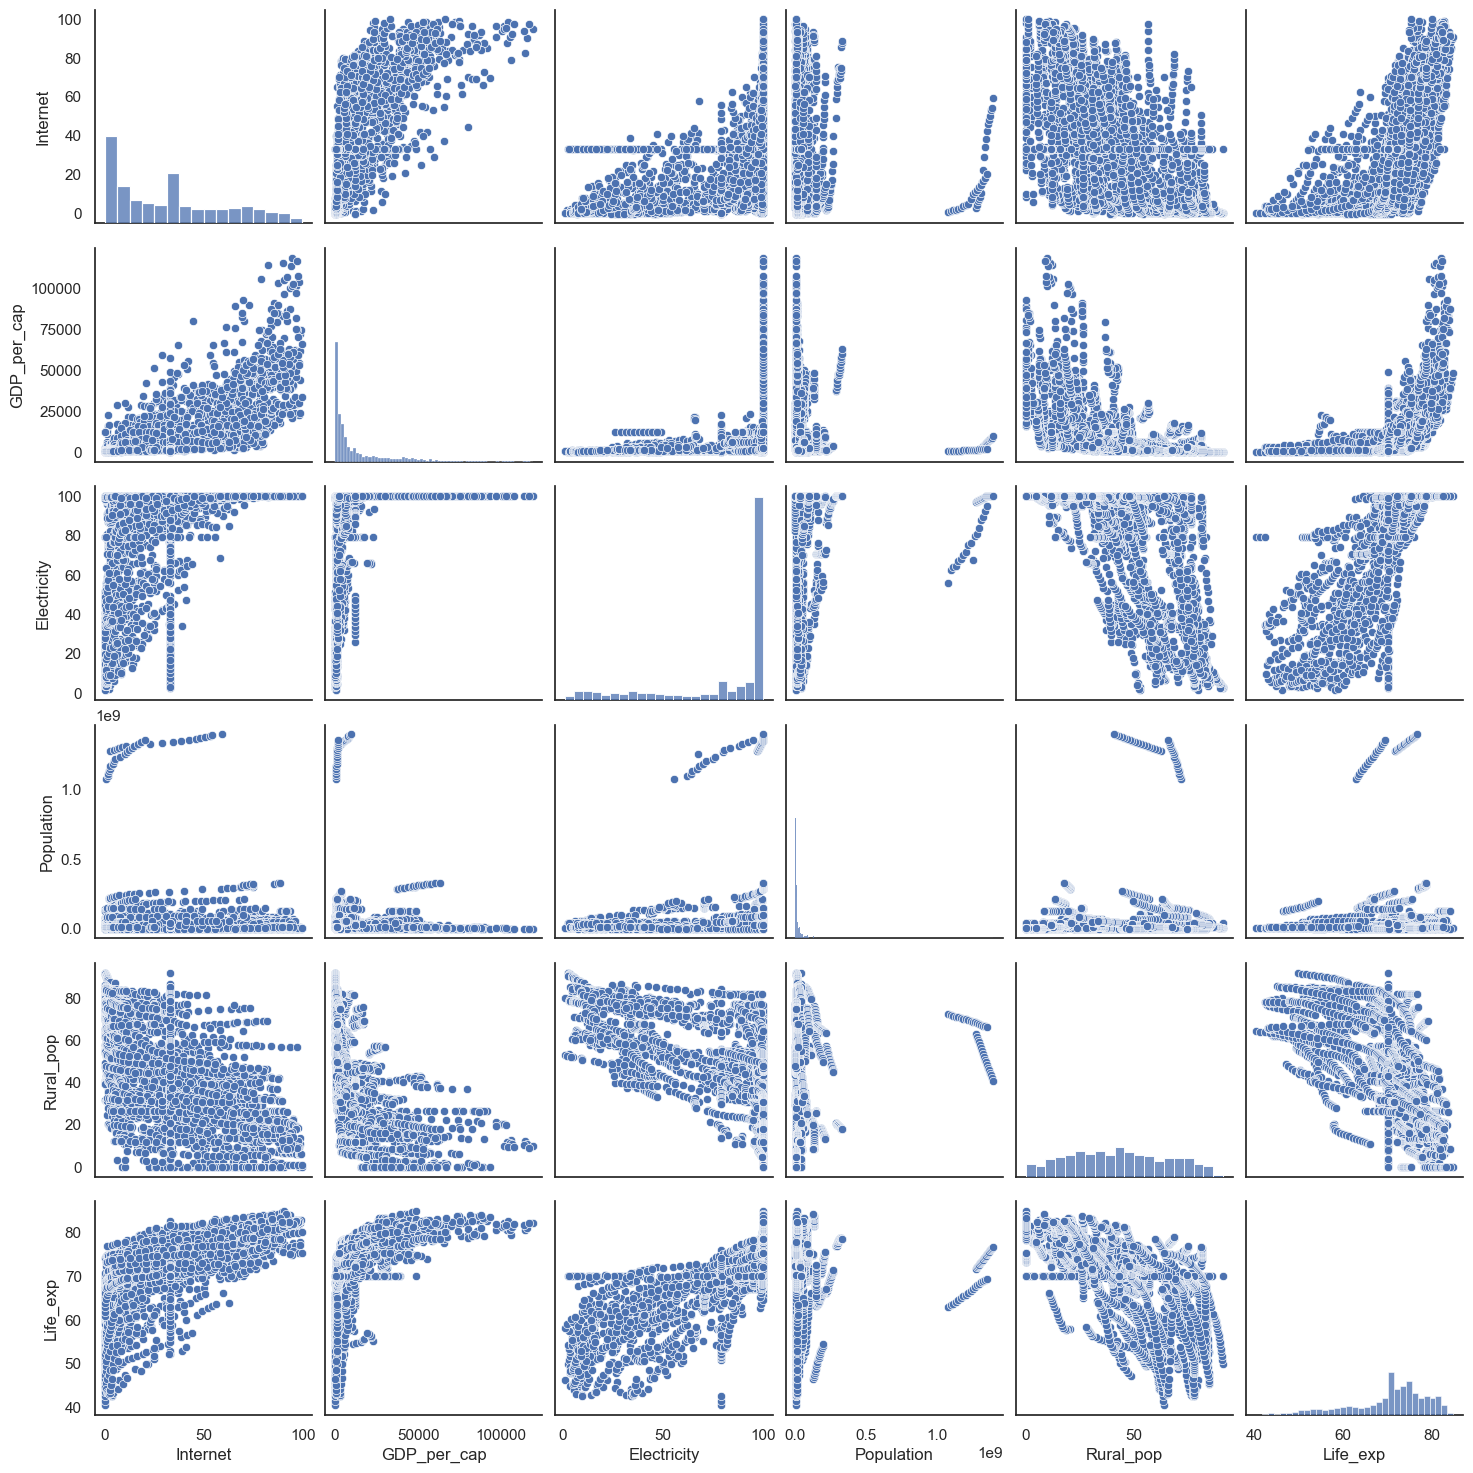

In [30]:
sns.pairplot(sel_feat)

# Exploración de los datos considerando si los países son mayormente rurales o urbanos
 
  
   
   

In [31]:
#Agrego una nueva columna al dataframe 'df' que indique, a partir del porcentaje de poblacion rural, si el pais es mayormente
#rural o urbano

df['rural_urban'] = np.where(df['Rural_pop']>= 50, 'Rural', 'Urban')
#df.head(25)

In [32]:
df['rural_urban'].value_counts()

Urban    2051
Rural    1236
Name: rural_urban, dtype: int64

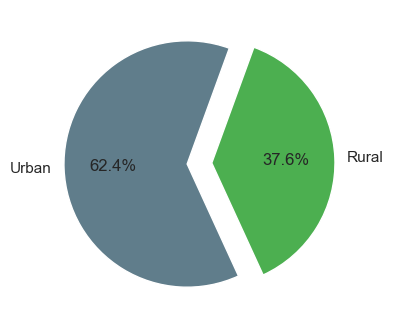

In [33]:
u_r_col = ['#607D8B', '#4CAF50']
sns.set(rc={'figure.figsize':(4,4)})
sns.set_theme(palette = u_r_col)

plt.pie(df['rural_urban'].value_counts(), labels = ('Urban', 'Rural'),autopct = '%.1f%%', explode = (0, 0.2), startangle = 70)
plt.show()

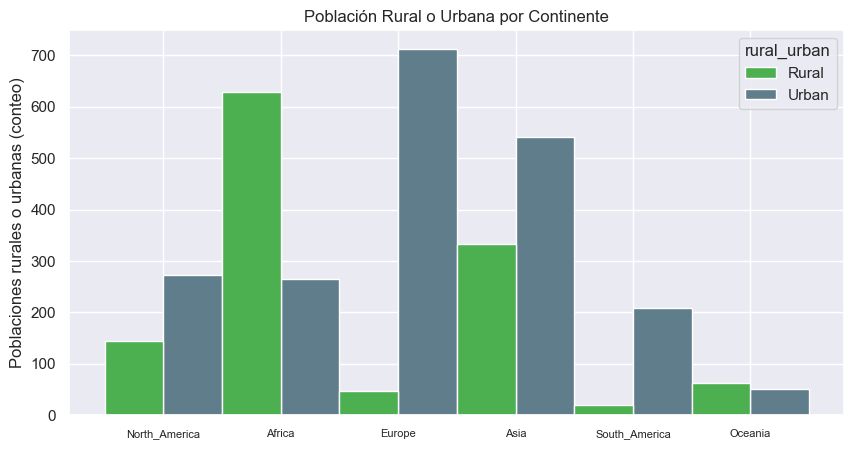

In [34]:
r_u_col = ['#4CAF50', '#607D8B']

sns.set(rc={'figure.figsize':(10,5)})
sns.histplot(data=df,x='Continent',hue='rural_urban',stat='count', multiple='dodge', palette = r_u_col, alpha = 1)
plt.xticks(fontsize =8)
plt.title('Población Rural o Urbana por Continente')
plt.xlabel(' ')
plt.ylabel('Poblaciones rurales o urbanas (conteo)')
plt.show()

#### Este histograma nos muestra los grandes contrastes que hay entre los continentes respecto a la cantidad de poblacion rural y urbana de los paises. Europa lidera entre los continentes mas urbanizados. Mientras que Africa y Oceania son continentes menos urbanizados. Resalta la baja poblacion rural que registra Sudamerica. Africa es el continente con mayor cantidad de países con población mayoritariamente rural, con una gran diferencia respecto al segundo continente más rural: Asia

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'North_America'),
  Text(1, 0, 'Africa'),
  Text(2, 0, 'Europe'),
  Text(3, 0, 'Asia'),
  Text(4, 0, 'South_America'),
  Text(5, 0, 'Oceania')])

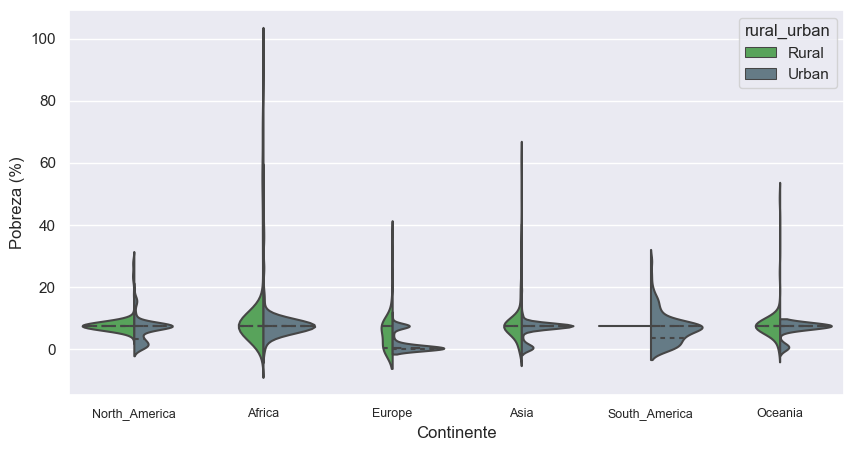

In [35]:
sns.set(rc={'figure.figsize':(10,5)})
sns.violinplot(x='Continent', y = 'Poverty', hue='rural_urban', data = df, split = True, inner = 'quart', palette = r_u_col)
plt.ylabel('Pobreza (%)')
plt.xlabel('Continente')
plt.xticks(fontsize = 9)

# Objetivo a1:

### Determinar si existe una relación directa entre el porcentaje de población rural y el porcentaje de desempleo femenino

In [36]:
#Separo variable target: Porcentaje de desempleo femenino

y1 = df[['Unemp_fem']]


In [37]:
#Feature: Porcentaje de poblacion rural

X1 = df[['Rural_pop']]

In [38]:
type(y1)

pandas.core.frame.DataFrame

In [39]:
type(X1)

pandas.core.frame.DataFrame

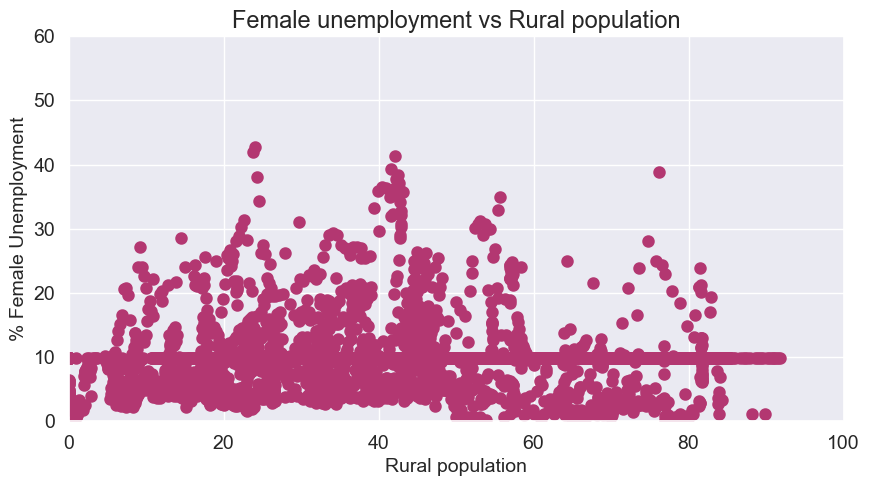

In [40]:
#Visualizo las variables

plt.title('Female unemployment vs Rural population', fontsize = 17)
plt.xlabel('Rural population', fontsize = 14)
plt.ylabel('% Female Unemployment', fontsize = 14)
#plt.text(x = 0, y = -0.5, s = '', fontsize = 12)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.ylim(0, 60)
plt.xlim(0, 100)

plt.scatter(X1, y1, color = '#B33771', linewidth = 3)
plt.show()

In [41]:
#Calculo una regresion simple

regr = LinearRegression()

In [42]:
regr.fit(X1, y1)

LinearRegression()

In [43]:
print('Theta1: ', regr.coef_[0][0])
print('Intercept1: ', regr.intercept_[0])
print('R-squared: ', regr.score(X1, y1))

Theta1:  0.0068158727716069924
Intercept1:  9.518352548687767
R-squared:  0.000848369696620721


Obtuvimos un valor de R-squared demasiado cercano a 0. Esto nos indica que nuestro modelo no tiene valor predictivo.
Lo mismo nos indica el valor de la pendiente obtenida, que también es muy cercana a cero, es decir que prácticamente al variar la población rural, el desempleo femenino no se ve afectado.

In [44]:
#A pesar de lo que podemos ver, generamos predicciones para poder graficar una línea sobre nuestro gráfico de dispersión
#y corroborar gráficamente lo visto en números

predicted_unemp_fem = regr.predict(X1)

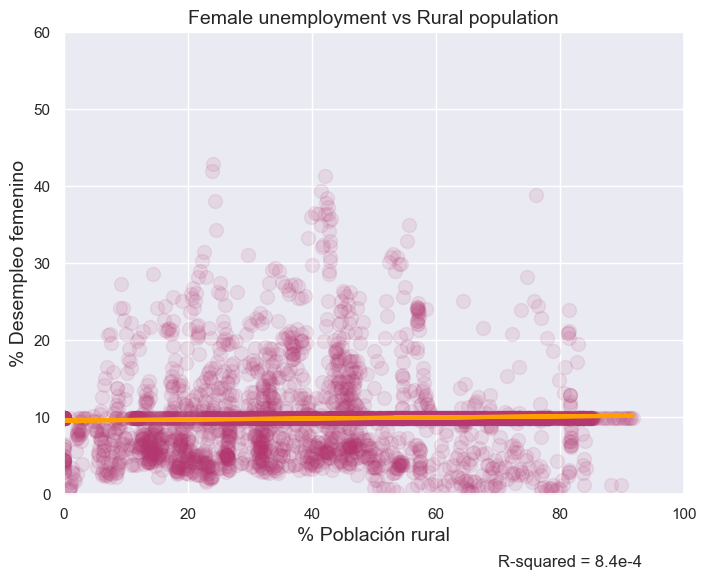

In [45]:
plt.figure(figsize = (8,6))
plt.title('Female unemployment vs Rural population', fontsize = 14)
plt.xlabel('% Población rural', fontsize = 14)
plt.ylabel('% Desempleo femenino', fontsize = 14)
plt.text(x = 70, y = -9.5, s = 'R-squared = 8.4e-4', fontsize = 12)
plt.ylim(0, 60)
plt.xlim(0, 100)

plt.scatter(X1, y1, color = '#B33771', alpha = 0.1, s = 100)
plt.plot(X1, predicted_unemp_fem, c = '#FFA000', linewidth = 3)
plt.show()

### Podemos entonces a través del gráfico notar lo mismo que en nuestros cálculos. No parece haber una relación entre el porcentaje de población rural y el desempleo femenino. Incluso vemos que los valores más altos de desempleo (>40%) pueden verse en paises con poca y mucha poblacion rural indistintamente.





# Objetivo a2:




### Esclarecer si la tendencia de cada continente es hacia una mayor participación política femenina, y cómo esto se relaciona con el porcentaje de desempleo femenino.

Text(0.5, 0, 'Participacion femenina en parlamentos (%)')

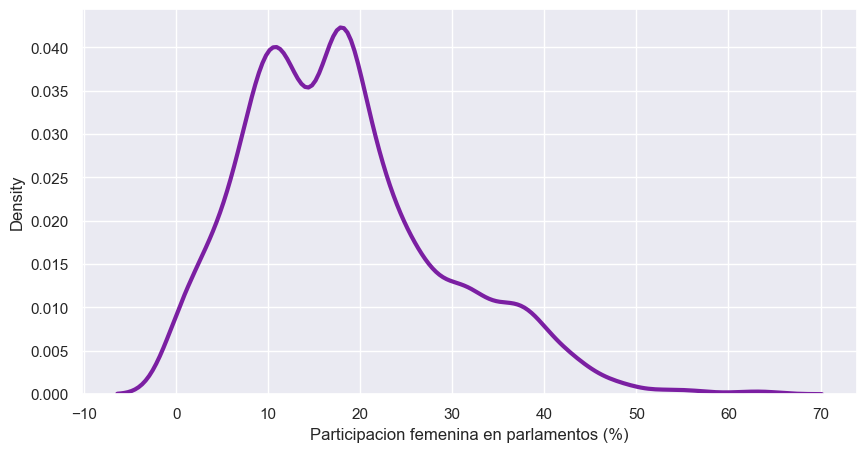

In [46]:
sns.kdeplot(data=features, x='Fem_parliam', color = '#7B1FA2', linewidth = 3)
plt.xlabel('Participacion femenina en parlamentos (%)', fontsize = 12)

Este grafico KDE (Kernell Density Estimate) nos esta indicando que la mayor densidad de las observaciones se encuentran por debajo del 20%. Es decir, la mayor parte de los paises para los que se tienen datos, posee una participacion femenina por debajo del 20% del total.

In [47]:
#Busco ver la tendencia general de la participación política femenina (%) a lo largo de los años

#creamos un array de numpy para almacenar los años

dates = np.array(df['Year'])


#creamos un array de numpy para almacenar los porcentajes de desnutrición

pc_fem_polit = np.array(df['Fem_parliam'])

#obtenemos una lista de los años con los que trabajaremos

years = np.unique(dates[:])
print(years)

#En el siguiente diccionario vamos a almacenar los datos obtenidos

fem_pol_year = {}

for year in years:

    year_values_fem_pol = pc_fem_polit[dates[:]==year]#Seleccionamos solo las filas del array de valores que correspondan al año actual
    mean_year_values1 = np.mean(year_values_fem_pol)#Calculamos la media de los valores del año actual
    fem_pol_year[year] = mean_year_values1 #Almacenamos la suma en el diccionario para su posterior uso

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018]


In [48]:
fem_pol_year

{2000: 13.358193027034446,
 2001: 13.40963614557037,
 2002: 14.658686570956625,
 2003: 14.648824829155952,
 2004: 15.367971292673504,
 2005: 16.129023091962523,
 2006: 16.288787317138,
 2007: 17.417506914805113,
 2008: 17.606735792374995,
 2009: 18.220073551637483,
 2010: 18.150031046215517,
 2011: 18.798817669374994,
 2012: 19.633169030242044,
 2013: 20.40830768707472,
 2014: 20.652520199295406,
 2015: 21.15184757073575,
 2016: 21.419232174969032,
 2017: 21.870355135548404,
 2018: 22.367802539034987}

Text(0.5, 0, 'Año')

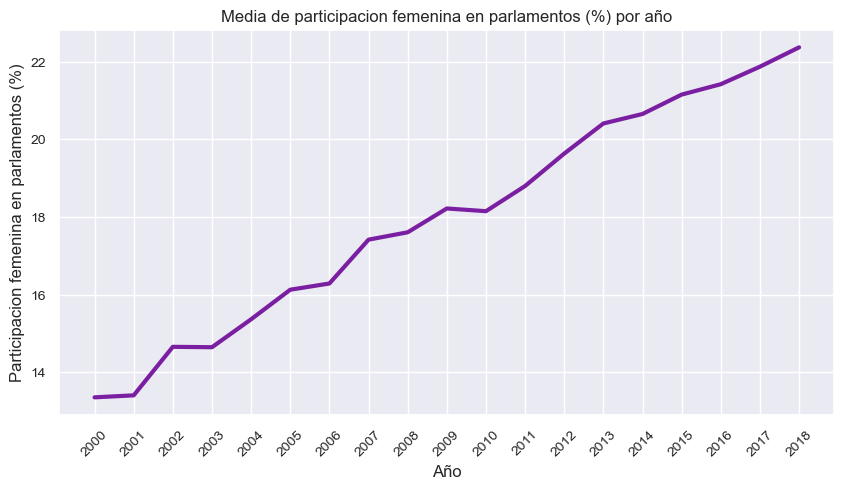

In [49]:
fig, ax = plt.subplots(figsize = (10,5))

plt.plot(range(len(fem_pol_year)), list(fem_pol_year.values()), color = '#7B1FA2', linewidth = 3)
plt.xticks(range(len(fem_pol_year)), list(fem_pol_year.keys()), fontsize = 10, rotation = 45)
plt.yticks(fontsize = 10)
ax.set_title('Media de participacion femenina en parlamentos (%) por año')
ax.set_ylabel('Participacion femenina en parlamentos (%)')
ax.set_xlabel('Año')

In [50]:
df_femp_year = pd.DataFrame.from_dict(fem_pol_year, orient = 'index')
df_femp_year.columns = ['Fem_pol_pct'] #Nombro a la unica columna del df por ahora
df_femp_year = df_femp_year.reset_index()
df_femp_year.columns = ['year', 'Fem_pol_pct']
df_femp_year


,year,Fem_pol_pct
0,2000,13.358193
1,2001,13.409636
2,2002,14.658687
3,2003,14.648825
4,2004,15.367971
5,2005,16.129023
6,2006,16.288787
7,2007,17.417507
8,2008,17.606736
9,2009,18.220074


In [51]:
fp_year = df_femp_year[['year']]
type(fp_year)

pandas.core.frame.DataFrame

In [52]:
fp_pct = df_femp_year[['Fem_pol_pct']]
type(fp_pct)

pandas.core.frame.DataFrame

In [53]:
#Calculo una regresion simple

regr1 = LinearRegression()

In [54]:
regr1.fit(fp_year, fp_pct)

LinearRegression()

In [55]:
print('Theta1: ', regr1.coef_[0][0])
print('Intercept1: ', regr1.intercept_[0])
print('R-squared: ', regr1.score(fp_year, fp_pct))

Theta1:  0.5122686631951676
Intercept1:  -1011.1710326966813
R-squared:  0.9922492917687922


In [56]:
predicted_femp = regr1.predict(fp_year)
#predicted_2050 = regr2.predict()
predicted_femp


#Quisiera usar esta regresión para predecir cuándo encontraríamos paridad entre sexos en la participación politica
#a nivel mundial. Pero hasta ahora mis intentos vienen fallando.

'''
future = np.arange(2000, 2051, 1)
type(future)

femp_future = regr2.predict(future)
print(femp_future)'''

'\nfuture = np.arange(2000, 2051, 1)\ntype(future)\n\nfemp_future = regr2.predict(future)\nprint(femp_future)'

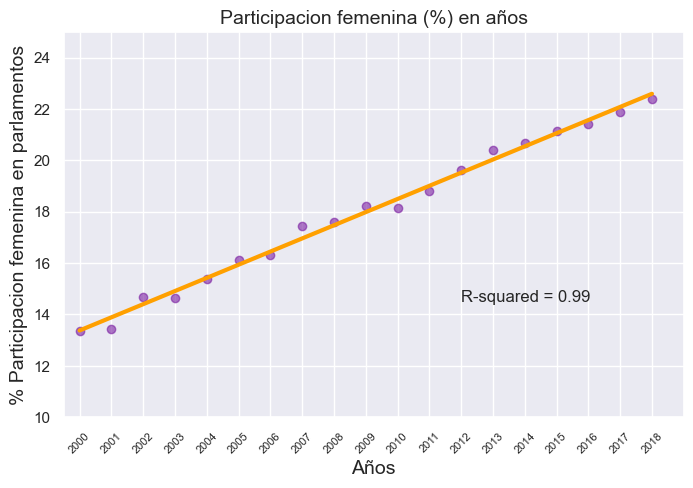

In [57]:
plt.figure(figsize = (8,5))
plt.title('Participacion femenina (%) en años', fontsize = 14)
plt.xlabel('Años', fontsize = 14)
plt.ylabel('% Participacion femenina en parlamentos', fontsize = 14)
plt.xticks(df_femp_year['year'], fontsize = 8, rotation = 45)
plt.text(x = 2012, y = 14.5, s = 'R-squared = 0.99', fontsize = 12)
plt.ylim(10, 25)
plt.xlim(1999.5, 2019)

plt.scatter(fp_year, fp_pct, color = '#7B1FA2', alpha = 0.6)
plt.plot(fp_year, predicted_femp, c = '#FFA000', linewidth = 3)
plt.show()

In [58]:
df['Continent'].value_counts()

Africa           893
Asia             874
Europe           760
North_America    418
South_America    228
Oceania          114
Name: Continent, dtype: int64

In [59]:
Africa = df[df['Continent'] == 'Africa']
Asia = df[df['Continent'] == 'Asia']
Europe = df[df['Continent'] == 'Europe']
N_america = df[df['Continent'] == 'North_America']
S_america = df[df['Continent'] == 'South_America']
Oceania = df[df['Continent'] == 'Oceania']
print(Africa.shape)
print(Asia.shape)
print(Europe.shape)
print(N_america.shape)
print(S_america.shape)
print(Oceania.shape)

(893, 28)
(874, 28)
(760, 28)
(418, 28)
(228, 28)
(114, 28)


### Media de participacion politica femenina en Africa por año

In [60]:
#Busco ver la tendencia general de la participación política femenina (%) de cada continente a lo largo de los años

#creamos un array de numpy para almacenar los años

afri_dates = np.array(Africa['Year'])

afri_fem_polit = np.array(Africa['Fem_parliam'])

#obtenemos una lista de los años con los que trabajaremos

years = np.unique(afri_dates[:])

#En el siguiente diccionario vamos a almacenar los datos obtenidos

afri_fp_year = {}

for year in years:

    year_afri_fem_pol = afri_fem_polit[afri_dates[:]==year]#Seleccionamos solo las filas del array de valores que correspondan al año actual
    mean_year_values2 = np.mean(year_afri_fem_pol)#Calculamos la suma de los valores del año actual
    afri_fp_year[year] = mean_year_values2 #Almacenamos la suma en el diccionario para su posterior uso
    

In [61]:
#afri_fp_year

### Media de participacion politica femenina en Asia por año

In [62]:
asia_dates = np.array(Asia['Year'])

asia_fem_polit = np.array(Asia['Fem_parliam'])

years = np.unique(asia_dates[:])

asia_fp_year = {}

for year in years:

    year_asia_fem_pol = asia_fem_polit[asia_dates[:]==year]
    mean_year_values3 = np.mean(year_asia_fem_pol)
    asia_fp_year[year] = mean_year_values3

In [63]:
#asia_fp_year

### Media de participacion politica femenina en Europa por año

In [64]:
euro_dates = np.array(Europe['Year'])

euro_fem_polit = np.array(Europe['Fem_parliam'])

years = np.unique(euro_dates[:])

euro_fp_year = {}

for year in years:

    year_euro_fem_pol = euro_fem_polit[euro_dates[:]==year]
    mean_year_values4 = np.mean(year_euro_fem_pol)
    euro_fp_year[year] = mean_year_values4

In [65]:
#euro_fp_year

### Media de participacion politica femenina en Norte America por año

In [66]:
n_am_dates = np.array(N_america['Year'])

n_am_fem_polit = np.array(N_america['Fem_parliam'])

years = np.unique(n_am_dates[:])

n_am_fp_year = {}

for year in years:

    year_n_am_fem_pol = n_am_fem_polit[n_am_dates[:]==year]
    mean_year_values5 = np.mean(year_n_am_fem_pol)
    n_am_fp_year[year] = mean_year_values5

In [67]:
#n_am_fp_year

### Media de participacion politica femenina en Sudámerica por año

In [68]:
s_am_dates = np.array(S_america['Year'])

s_am_fem_polit = np.array(S_america['Fem_parliam'])

years = np.unique(s_am_dates[:])

s_am_fp_year = {}

for year in years:

    year_s_am_fem_pol = s_am_fem_polit[s_am_dates[:]==year]
    mean_year_values6 = np.mean(year_s_am_fem_pol)
    s_am_fp_year[year] = mean_year_values6

In [69]:
#s_am_fp_year

### Media de participacion politica femenina en Oceania por año

In [70]:
ocean_dates = np.array(Oceania['Year'])

ocean_fem_polit = np.array(Oceania['Fem_parliam'])

years = np.unique(ocean_dates[:])

ocean_fp_year = {}

for year in years:

    year_ocean_fem_pol = ocean_fem_polit[ocean_dates[:]==year]
    mean_year_values7 = np.mean(year_ocean_fem_pol)
    ocean_fp_year[year] = mean_year_values7

In [71]:
#ocean_fp_year

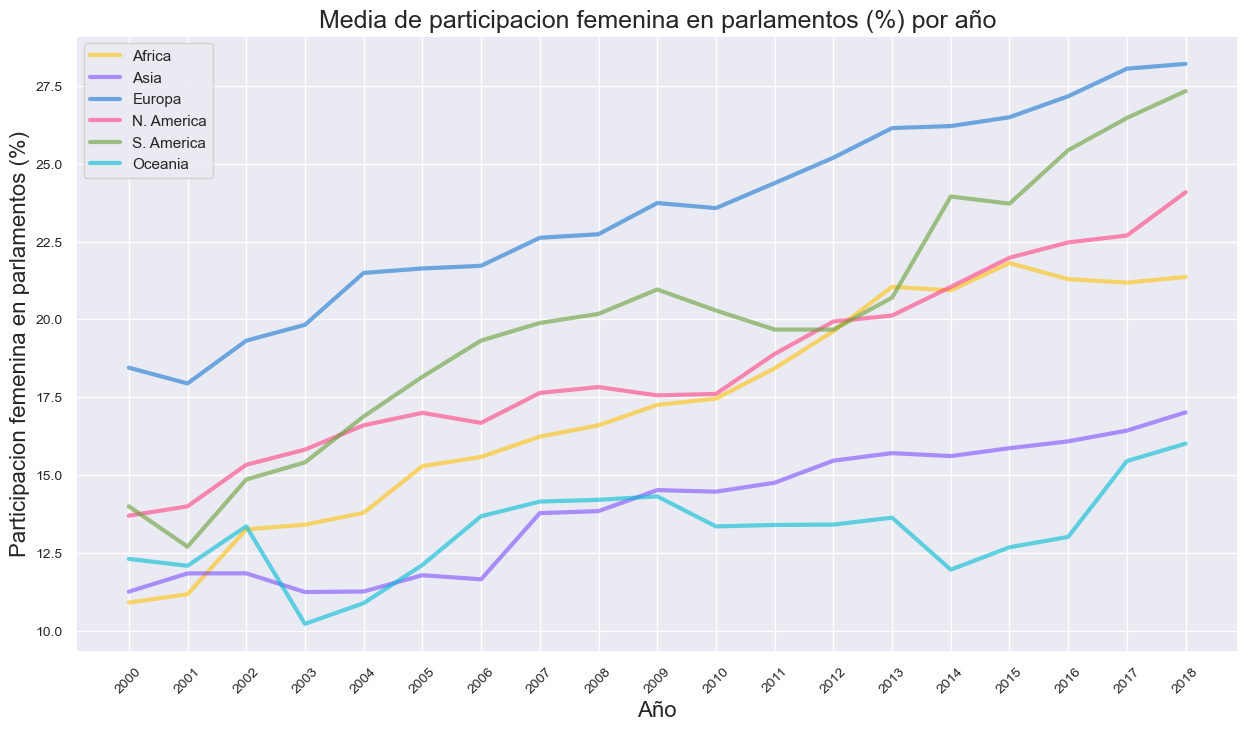

In [72]:
africol = '#FFC107'
asicol = '#7C4DFF'
eurocol = '#1976D2'
namcol = '#FF4081'
sudcol = '#689F38'
ocecol = '#00BCD4'

fig, ax = plt.subplots(figsize = (15,8))

plt.plot(range(len(fem_pol_year)), list(afri_fp_year.values()), color = africol, linewidth = 3, alpha = 0.6, label = 'Africa')
plt.plot(range(len(fem_pol_year)), list(asia_fp_year.values()), color = asicol, linewidth = 3, alpha = 0.6, label = 'Asia')
plt.plot(range(len(fem_pol_year)), list(euro_fp_year.values()), color = eurocol, linewidth = 3, alpha = 0.6, label = 'Europa')
plt.plot(range(len(fem_pol_year)), list(n_am_fp_year.values()), color = namcol, linewidth = 3, alpha = 0.6, label = 'N. America')
plt.plot(range(len(fem_pol_year)), list(s_am_fp_year.values()), color = sudcol, linewidth = 3, alpha = 0.6, label = 'S. America')
plt.plot(range(len(fem_pol_year)), list(ocean_fp_year.values()), color = ocecol, linewidth = 3, alpha = 0.6, label = 'Oceania')



plt.xticks(range(len(fem_pol_year)), list(fem_pol_year.keys()), fontsize = 10, rotation = 45)
plt.yticks(fontsize = 10)
ax.set_title('Media de participacion femenina en parlamentos (%) por año', fontsize = 18)
ax.set_ylabel('Participacion femenina en parlamentos (%)', fontsize = 16)
ax.set_xlabel('Año', fontsize = 16)
ax.legend()
plt.show()

### A partir de esta visualizacion vemos que en la mayoria de los continentes el porcentaje de mujeres participando en el parlamento tiende a crecer año tras año. Si bien todas registran altos y bajos, la tendencia es al aumento de este porcentaje. Los continentes con menor porcentaje de mujeres en el parlamento son Oceanía y Asia, mientras que en el otro extremo encontramos a Europa y Sudamérica, que se despegó de los porcentajes de Norte América en los últimos años. Es curioso, por otro lado, que la meseta que se da en el porcentaje entre 2009 y 2013 en Sudamérica coincide con tres mujeres ocupando el mayor cargo ejecutivo en el continente (Cristina Fernández de Kirchner en Argentina, Michelle Bachelet en Chile, y Dilma Rousseff en Brasil).

In [73]:
#Hacer regresion de participacion femenina vs desempleo femenino

#y1 = df[['Unemp_fem']] Recordamos que ya existe una variable que contiene los valores de % de desempleo femenino

#Definimos X, que será el % de participación femenina

X2 = df[['Fem_parliam']]

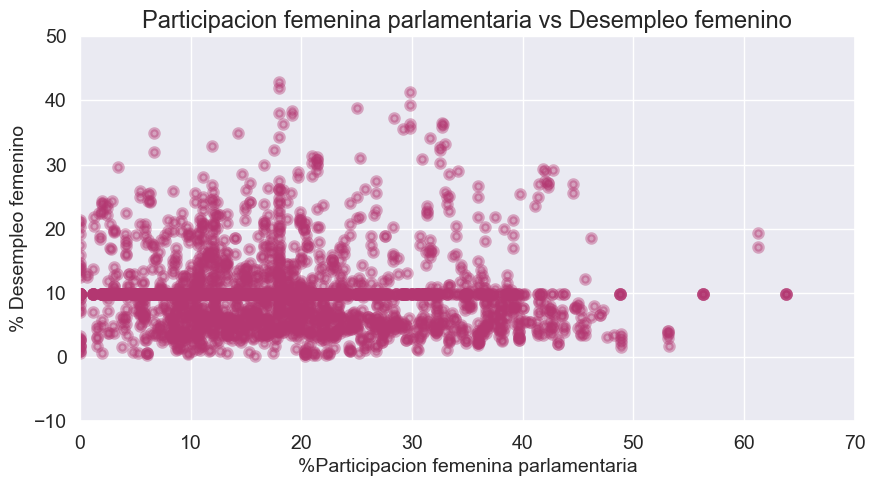

In [74]:
#Visualizo las variables

plt.title('Participacion femenina parlamentaria vs Desempleo femenino', fontsize = 17)
plt.xlabel('%Participacion femenina parlamentaria', fontsize = 14)
plt.ylabel('% Desempleo femenino', fontsize = 14)
#plt.text(x = 0, y = -0.5, s = '', fontsize = 12)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.ylim(-10, 50)
plt.xlim(0, 70)

plt.scatter(X2, y1, color = '#B33771', linewidth = 3, alpha = 0.4)
plt.show()

In [75]:
X2_train, X2_test, y1_train, y1_test = train_test_split(X2, y1, random_state = 42, test_size = 0.25)

In [76]:
#Calculo y entreno una regresion simple

regr2 = LinearRegression()
regr2.fit(X2_train, y1_train)

LinearRegression()

In [77]:
accuracy_lr = regr2.score(X2_test, y1_test)
accuracy_lr

0.0005822802938738603

In [78]:
predicted_unemp = regr2.predict(X2_test)
predicted_unemp.shape

(822, 1)

In [79]:
print('Theta1: ', regr2.coef_[0][0])
print('Intercept1: ', regr2.intercept_[0])
print('R-squared: ', regr2.score(X2_test, y1_test))

Theta1:  -0.02411640666344237
Intercept1:  10.339403563724124
R-squared:  0.0005822802938738603


### Vemos entonces, a partir de nuestro modelo de regresion simple, que no hay una asociacion estadisticamente significativa entre el porcentaje de participacion politica femenina en los parlamentos y el porcentaje de desempleo femenino. A priori era posible pensar que una mayor presencia de mujeres en la politica permitiria la implementacion de politicas que favoreciese la igualdad economica entre los sexos, pero los datos contradicen esa suposicion

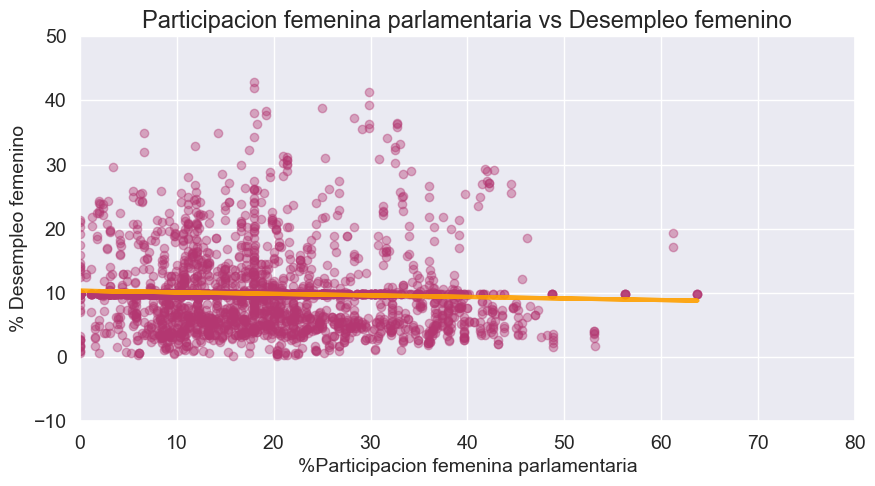

In [80]:

plt.title('Participacion femenina parlamentaria vs Desempleo femenino', fontsize = 17)
plt.xlabel('%Participacion femenina parlamentaria', fontsize = 14)
plt.ylabel('% Desempleo femenino', fontsize = 14)
#plt.text(x = 0, y = -0.5, s = '', fontsize = 12)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.ylim(-10, 50)
plt.xlim(0, 80)

plt.scatter(X2, y1, color = '#B33771', alpha = 0.4)
plt.plot(X2_test, predicted_unemp, c = '#FFA000', linewidth = 3, alpha = 0.9)
plt.show()

In [81]:
#Probar con las variables escaladas

from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x = StandardScaler()
X2_sca = scaler_x.fit_transform(X2)

In [82]:
scaler_y = StandardScaler()
y1_sca = scaler_x.fit_transform(y1)

In [83]:
X2_train, X2_test, y1_train, y1_test = train_test_split(X2_sca, y1_sca, random_state = 42, test_size = 0.25)

regr3 = LinearRegression()
regr3.fit(X2_train, y1_train)
accuracy_lr1 = regr3.score(X2_test, y1_test)
print('Model accuracy:', accuracy_lr1)

predicted_unemp1 = regr3.predict(X2_test)
predicted_unemp1.shape

Model accuracy: 0.0005822802938735272


(822, 1)

In [84]:
print('Theta1: ', regr3.coef_[0][0])
print('Intercept1: ', regr3.intercept_[0])
print('R-squared: ', regr3.score(X2_test, y1_test))

Theta1:  -0.04890613711868613
Intercept1:  0.017941281877814838
R-squared:  0.0005822802938735272


### Vemos que, al escalar las variables utilizadas para nuestro modelo de regresion lineal, la precision del modelo no se ha visto modificada significativamente.

# Objetivo a3:

### Estimar cuándo se alcanzaría la paridad de participación parlamentaria entre géneros en el mundo si las tendencias continuaran igual

In [85]:
regr1.coef_[0][0]
regr1.intercept_[0]

-1011.1710326966813

In [86]:
#Ya tenemos una regresión lineal hecha que puede servir para estimar la paridad parlamentaria: regr2
#La pendiente de regr2, que es regr2.coef_ , debería ser la clave para conseguirlo.

#a = regr1.coef_[0][0]

#new_x = 3
#previous_x = 2018

#x_list = [new_x]
#slope_list = [df(new_x)]

#for n in range(1000):
 #   previous_x = new_x
    #gradient = df(previous_x)
  #  new_x = (previous_x + 1) * a
    
    #step_size = abs(new_x - previous_x)
    #print(step_size)
    
   # x_list.append(new_x)
    #slope_list.append(df(new_x))
    
    #if step_size <= 50:
     #   print('La paridad : ', n)
      #  break

# Objetivo b1:

### Analizar las tendencias de urbanización en distintas zonas del mundo.

### Media de porcentaje de poblaciones rurales por año en África

In [87]:
#Busco ver la tendencia de porcentaje de poblaciones rurales (%) de cada continente a lo largo de los años

#creamos un array de numpy para almacenar los años

afri_dates = np.array(Africa['Year'])

afri_rural = np.array(Africa['Rural_pop'])

#obtenemos una lista de los años con los que trabajaremos

years = np.unique(afri_dates[:])

#En el siguiente diccionario vamos a almacenar los datos obtenidos

afri_rural_year = {}

for year in years:

    year_afri_rural = afri_rural[afri_dates[:]==year]#Seleccionamos solo las filas del array de valores que correspondan al año actual
    mean_year_values8 = np.mean(year_afri_rural)#Calculamos la suma de los valores del año actual
    afri_rural_year[year] = mean_year_values8 #Almacenamos la suma en el diccionario para su posterior uso
    

In [88]:
#afri_rural_year

### Media de porcentaje de poblaciones rurales por año en Asia

In [89]:
asia_dates = np.array(Asia['Year'])

asia_rural = np.array(Asia['Rural_pop'])

years = np.unique(asia_dates[:])

asia_rural_year = {}

for year in years:

    year_asia_rural = asia_rural[asia_dates[:]==year]
    mean_year_values9 = np.mean(year_asia_rural)
    asia_rural_year[year] = mean_year_values9

In [90]:
#asia_rural_year

### Media de porcentaje de poblaciones rurales por año en Europa

In [91]:
euro_dates = np.array(Europe['Year'])

euro_rural = np.array(Europe['Rural_pop'])

years = np.unique(euro_dates[:])

euro_rural_year = {}

for year in years:

    year_euro_rural = euro_rural[euro_dates[:]==year]
    mean_year_values10 = np.mean(year_euro_rural)
    euro_rural_year[year] = mean_year_values10

In [92]:
#euro_rural_year

### Media de porcentaje de poblaciones rurales por año en Norteamérica

In [93]:
n_am_dates = np.array(N_america['Year'])

n_am_rural = np.array(N_america['Rural_pop'])

years = np.unique(n_am_dates[:])

n_am_rural_year = {}

for year in years:

    year_n_am_rural = n_am_rural[n_am_dates[:]==year]
    mean_year_values11 = np.mean(year_n_am_rural)
    n_am_rural_year[year] = mean_year_values11

In [94]:
#n_am_rural_year

### Media de porcentaje de poblaciones rurales por año en Sudamérica

In [95]:
s_am_dates = np.array(S_america['Year'])

s_am_rural = np.array(S_america['Rural_pop'])

years = np.unique(s_am_dates[:])

s_am_rural_year = {}

for year in years:

    year_s_am_rural = s_am_rural[s_am_dates[:]==year]
    mean_year_values12 = np.mean(year_s_am_rural)
    s_am_rural_year[year] = mean_year_values12

In [96]:
#s_am_rural_year

### Media de porcentaje de poblaciones rurales por año en Oceanía

In [97]:
ocean_dates = np.array(Oceania['Year'])

ocean_rural = np.array(Oceania['Rural_pop'])

years = np.unique(ocean_dates[:])

ocean_rural_year = {}

for year in years:

    year_ocean_rural = ocean_rural[ocean_dates[:]==year]
    mean_year_values13 = np.mean(year_ocean_rural)
    ocean_rural_year[year] = mean_year_values13

In [98]:
#ocean_rural_year

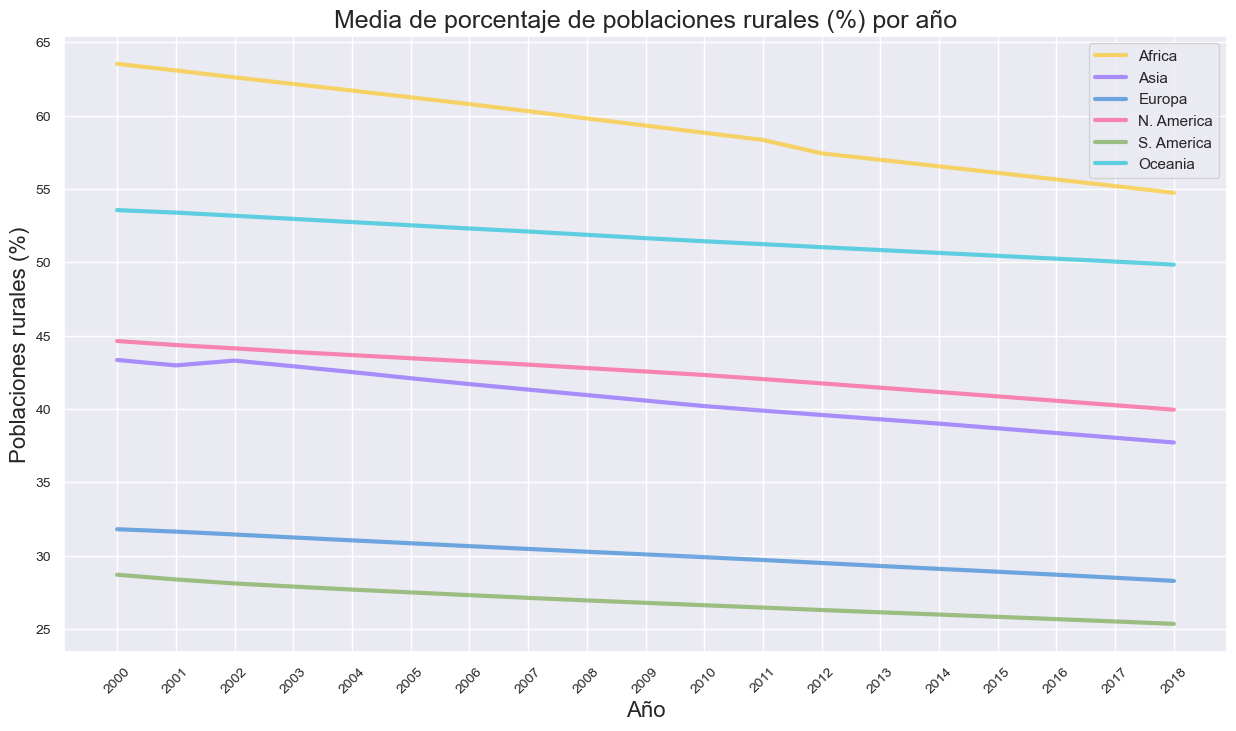

In [99]:
africol = '#FFC107'
asicol = '#7C4DFF'
eurocol = '#1976D2'
namcol = '#FF4081'
sudcol = '#689F38'
ocecol = '#00BCD4'

fig, ax = plt.subplots(figsize = (15,8))

plt.plot(range(len(afri_rural_year)), list(afri_rural_year.values()), color = africol, linewidth = 3, alpha = 0.6, label = 'Africa')
plt.plot(range(len(afri_rural_year)), list(asia_rural_year.values()), color = asicol, linewidth = 3, alpha = 0.6, label = 'Asia')
plt.plot(range(len(afri_rural_year)), list(euro_rural_year.values()), color = eurocol, linewidth = 3, alpha = 0.6, label = 'Europa')
plt.plot(range(len(afri_rural_year)), list(n_am_rural_year.values()), color = namcol, linewidth = 3, alpha = 0.6, label = 'N. America')
plt.plot(range(len(afri_rural_year)), list(s_am_rural_year.values()), color = sudcol, linewidth = 3, alpha = 0.6, label = 'S. America')
plt.plot(range(len(afri_rural_year)), list(ocean_rural_year.values()), color = ocecol, linewidth = 3, alpha = 0.6, label = 'Oceania')



plt.xticks(range(len(afri_rural_year)), list(afri_rural_year.keys()), fontsize = 10, rotation = 45)
plt.yticks(fontsize = 10)
ax.set_title('Media de porcentaje de poblaciones rurales (%) por año', fontsize = 18)
ax.set_ylabel('Poblaciones rurales (%)', fontsize = 16)
ax.set_xlabel('Año', fontsize = 16)
ax.legend()
plt.show()

### De esta visualización se desprende que en todos los continentes la tendencia general es a que disminuya el porcentaje de poblaciones rurales, lo que se traduce en un aumento de la urbanización. Sin embargo, este es un proceso que en los 19 años analizados no parece haber tenido una gran variación, a excepción del continente africano, donde las poblaciones rurales disminuyeron casi un 10%

# Objetivo b2:
## Tendencia de la prevalencia de desnutrición

### Investigar cómo se comporta la prevalencia de desnutrición en poblaciones urbanas y rurales.

In [100]:
#Busco ver la tendencia general de la prevalencia de desnutrición a lo largo de los años

#creamos un array de numpy para almacenar los años

dates = np.array(df['Year'])


#creamos un array de numpy para almacenar los porcentajes de desnutrición

pc_undernour = np.array(df['Undernour'])

#obtenemos una lista de los años con los que trabajaremos

years = np.unique(dates[:])
print(years)

#En el siguiente diccionario vamos a almacenar los datos obtenidos

undernour_year = {}

for year in years:

    year_values_undernour = pc_undernour[dates[:]==year]#Seleccionamos solo las filas del array de valores que correspondan al año actual
    mean_year_values = np.mean(year_values_undernour)#Calculamos la suma de los valores del año actual
    undernour_year[year] = mean_year_values#Almacenamos la suma en el diccionario para su posterior uso


[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018]


In [101]:
#print(undernour_year)

Text(0.5, 0, 'Año')

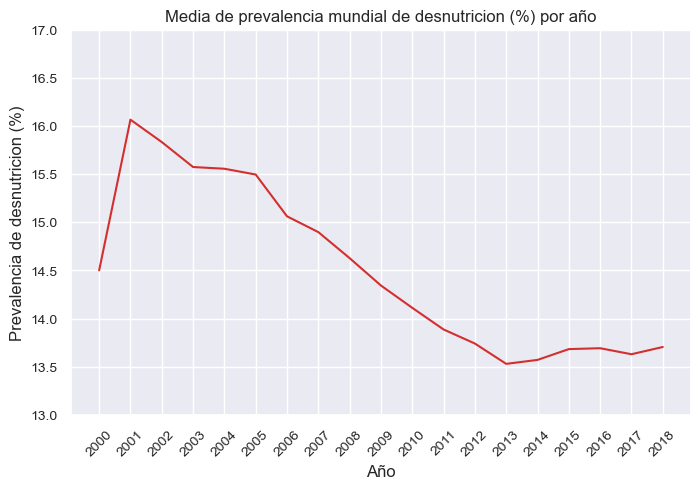

In [102]:
fig, ax = plt.subplots(figsize = (8,5))

plt.plot(range(len(undernour_year)), list(undernour_year.values()), color = '#D32F2F')
plt.ylim(13,17)
plt.xticks(range(len(undernour_year)), list(undernour_year.keys()), fontsize = 10, rotation = 45)
plt.yticks(fontsize = 10)
ax.set_title('Media de prevalencia mundial de desnutricion (%) por año')
ax.set_ylabel('Prevalencia de desnutricion (%)')
ax.set_xlabel('Año')

###TRATAR DE CAMBIARLO POR HISTOGRAMA DE SNS (CHEQUEAR LA OPCION DE QUE NO SEAN COLUMNAS)###

### Vemos gracias a este gráfico que entre los años 2000 y 2018, entre todos los países estudiados, se vio una prevalencia de desnutrición aproximadamente entre el 13 y el 16%. A partir de eso podemos notar entonces que si bien hubo una tendencia al descenso de esta prevalencia, esta variación fue muy pequeña, de menos de 3 puntos.

#### También es visible a través de este gráfico que las impresiones son manipulables. En un vistazo rápido podría tenerse la impresión de que hubo un notable descenso de la desnutrición a lo largo de los años. Pero al mirar con más detalle vemos que el eje y abarca un muy pequeño porcentaje, menor al 3%.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'North_America'),
  Text(1, 0, 'Africa'),
  Text(2, 0, 'Europe'),
  Text(3, 0, 'Asia'),
  Text(4, 0, 'South_America'),
  Text(5, 0, 'Oceania')])

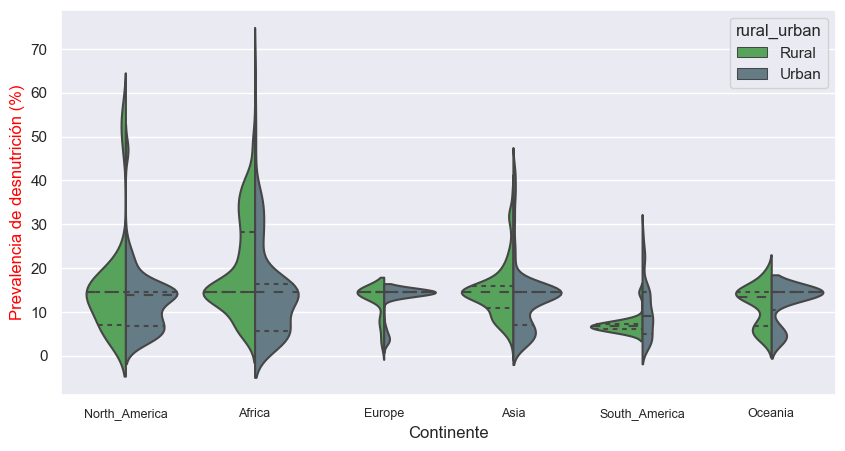

In [103]:
sns.set(rc={'figure.figsize':(10,5)})
sns.violinplot(x='Continent', y = 'Undernour', hue='rural_urban', data = df, split = True, inner = 'quart', palette = r_u_col)
plt.ylabel('Prevalencia de desnutrición (%)', color = 'red')
plt.xlabel('Continente')
plt.xticks(fontsize = 9)

#### En esta visualización vemos que la desnutrición parece comportarse de manera muy similar en poblaciones rurales y urbanas. Norteamérica y África tienen una media similar a las de los otros continentes, pero poseen un rango mayor de valores, lo que los lleva a tener más frecuencia de poblaciones con alta prevalencia de desnutrición.
#### Por otro lado, las poblaciones rurales de Sudamérica parecen tener una baja variación en la prevalencia de desnutrición, estando todas en un porcentaje menor al 10%

#### Para comprobar si la asociación entre la prevalencia de desnutrición y el porcentaje de poblaciones rurales es baja, realizaré una regresión simple.

In [104]:
regr4 = LinearRegression()

In [105]:
#No escalare las variables porque ambas ya se encuentran representadas por porcentajes

y4 = df[['Undernour']]
y4.shape

(3287, 1)

In [106]:
X4 = df[['Rural_pop']]
X4.shape

(3287, 1)

In [107]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, random_state = 42, test_size = 0.20)

In [108]:
#Calculo y entreno una regresion simple

regr4.fit(X4_train, y4_train)

LinearRegression()

In [109]:
accuracy_lr4 = regr4.score(X4_test, y4_test)
accuracy_lr4

0.05037570969181637

In [110]:
predicted_undernour = regr4.predict(X4_test)
predicted_undernour.shape

(658, 1)

In [111]:
print('Theta1: ', regr4.coef_[0][0])
print('Intercept1: ', regr4.intercept_[0])
print('R-squared: ', regr4.score(X4_test, y4_test))

Theta1:  0.08877745044894315
Intercept1:  10.734655055296653
R-squared:  0.05037570969181637


### Confirmamos entonces mediante este modelo que la asociación entre desnutrición y porcentaje de población rural de un país es muy baja. Más específicamente, sólo un 5% de la variación en la prevalencia de desnutrición es explicada por el porcentaje de población rural

# Objetivo c:

### Determinar si existe una asociación entre el PBI per cápita y  las variables obtenidas mediante Feature Selection.


In [112]:
sel_feat.head(3)

,Internet,GDP_per_cap,Electricity,Population,Rural_pop,Life_exp
0,33.117667,20617.75047,91.660398,3.891506e+07,53.283,70.160098
1,17.100000,20670.36701,100.000000,9.289200e+04,53.661,73.853000
2,18.800000,20436.88713,100.000000,9.499200e+04,54.028,73.937000


In [113]:
#Extraigo la varibale target y creo un dataframe con las features restantes

y = sel_feat[['GDP_per_cap']]
y.shape

(3287, 1)

In [114]:
X = sel_feat[['Internet', 'Electricity', 'Population', 'Rural_pop', 'Life_exp']]
X.shape

(3287, 5)

In [115]:
#Separacion del Dataset en Training y Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

print(len(X_train), len(y_train), len(X_test), len(y_test))
print(X_train.shape)

2629 2629 658 658
(2629, 5)


In [116]:
#Regresion Multiple para determinar la asociacion entre el PBI per capita y las features seleccionadas

regr = LinearRegression()

#Entrenamiento del modelo

regr.fit(X_train, y_train)

print('R-squared de entrenamiento:', regr.score(X_train, y_train))
print('R-squared de test:', regr.score(X_test, y_test))
print('Intercept:', regr.intercept_[0])


R-squared de entrenamiento: 0.5805907666186494
R-squared de test: 0.6035905488214925
Intercept: -8586.72968061047


In [117]:
pd.DataFrame(data = regr.coef_.transpose(), index = X_train.columns, columns = ['Coef'])

,Coef
Internet,3.306176e+02
Electricity,-1.648684e+02
Population,1.372265e-07
Rural_pop,-2.387262e+02
Life_exp,4.729198e+02


In [118]:
y.skew()

#Transformo datos para minimizar el skew

y_log = np.log(y)
print(y_log.head(2))
print(y_log.skew()) #El skew se minimizo mucho, casi como el de una distribucion normal

   GDP_per_cap
0     9.933908
1     9.936456
GDP_per_cap   -0.044395
dtype: float64


In [119]:
#Realizo nuevamente una modelo de regresion multiple con el target con transformacion logaritmica para ver si mejora
#la precision de mi modelo y sus parametros.

X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size = 0.2, random_state = 10)

regr.fit(X_train, y_train)

print('R-squared de entrenamiento:', regr.score(X_train, y_train))
print('R-squared de test:', regr.score(X_test, y_test))
print('Intercept:', regr.intercept_[0])

pd.DataFrame(data = regr.coef_.transpose(), index = X_train.columns, columns = ['Coef'])

R-squared de entrenamiento: 0.7809746504463531
R-squared de test: 0.7840458464230475
Intercept: 6.091841881481937


,Coef
Internet,2.096827e-02
Electricity,8.715297e-03
Population,-2.749182e-10
Rural_pop,-2.206227e-02
Life_exp,2.673183e-02


#### Luego de la transformacion logaritmica de la variable target, los valores de R-squared de train data y test data mejoraron notablemente.

#### Segun los coeficientes, las variables que mayor efecto generan sobre el PBI per capita son el acceso a internet, la esperanza de vida y el porcentaje de poblacion rural.

In [120]:
#Repito el proceso pero eliminando la variable de poblacion total, ya que segun el coeficiente estaria causando un efecto
#despreciable en el modelo.
X = sel_feat[['Internet', 'Electricity', 'Rural_pop', 'Life_exp']]

X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size = 0.2, random_state = 10)

regr.fit(X_train, y_train)

print('R-squared de entrenamiento:', regr.score(X_train, y_train))
print('R-squared de test:', regr.score(X_test, y_test))
print('Intercept:', regr.intercept_[0])

pd.DataFrame(data = regr.coef_.transpose(), index = X_train.columns, columns = ['Coef'])

R-squared de entrenamiento: 0.780391255108825
R-squared de test: 0.7839371089032234
Intercept: 6.111167777369619


,Coef
Internet,0.021076
Electricity,0.008524
Rural_pop,-0.022283
Life_exp,0.026602


#### Extraer la variable de Poblacion total no provoca cambios significativos en los parametros de mi modelo.

# Objetivo d:
### Diseñar una funcion que me permita estimar el PBI per cápita a partir de las features seleccionadas y utilizadas en mi regresión multiple.

In [179]:
def predictor_pbi(internet, electricity, rural_pop, life_exp):
    
    '''Funcion que permite estimar el PBI per capita de un pais a partir de:
    -Porcentaje de acceso a Internet
    -Porcentaje de acceso a la electricidad
    -Porcentaje de poblacion rural
    -Esperanza de vida
    
    Devuelve el logaritmo del PBI per capita y el PBI per capita en dolares
    '''
    if internet>100 or electricity>100 or rural_pop>100:
        print('Son porcentajes, es imposible mas que el 100% de una de las variables')
        return
    
    #Configuro entry, que es donde se van a cargar los parametros del modelo
    entry = np.zeros(shape = (1,4))
    
    
    entry[0][0] = internet
    entry[0][1] = electricity
    entry[0][2] = rural_pop
    entry[0][3] = life_exp
    
    entry = pd.DataFrame(data = entry, columns = X_train.columns)
    
    #Hacer la prediccion
    log_gdp_estimate = regr.predict(entry)
    
    return 'Log PBI per capita:', round(log_gdp_estimate[0][0],2), 'PBI per capita (U$S):', round(np.e**log_gdp_estimate[0][0],2)

In [180]:
predictor_pbi(internet = 9,electricity = 10, rural_pop = 79,life_exp = 50)

('Log PBI per capita:', 5.96, 'PBI per capita (U$S):', 386.0)